<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!pip install wget
import wget
wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv", "loan_train.csv")   


100% [..............................................................................] 23101 / 23101

'loan_train (26).csv'

### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train (7).csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\msugi\anaconda3

  added / updated specs:
    - seaborn


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.8.3-py37_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


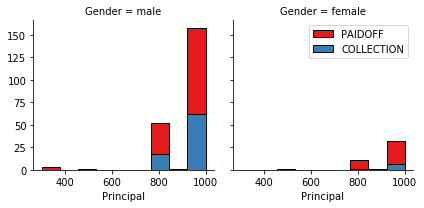

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

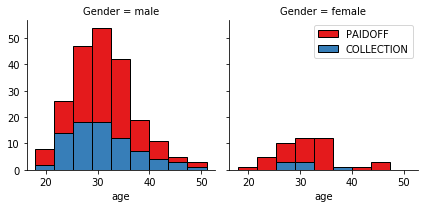

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

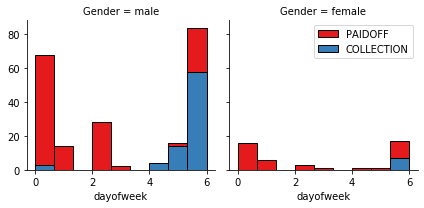

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# Convert the Loan Status to numeric value
#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

Get a summary of the numpy array of df['loan_status'] 

=> collections.Counter(nparray)

source: https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python

In [18]:
import collections, numpy

y = df['loan_status'].values
print("first 5 y: ", y[0:5], type(y), y.shape)

print("y's contents: ", collections.Counter(y))


first 5 y:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'] <class 'numpy.ndarray'> (346,)
y's contents:  Counter({'PAIDOFF': 260, 'COLLECTION': 86})


## <span style="color: red;"> One Hot Encoding for "loan_status" </span>
* Course Discussion Forum: https://www.coursera.org/learn/machine-learning-with-python/discussions/weeks/6/threads/ohrFwe63EemdJQ6Szw1keA
* Open Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/



## Normalize Data 

Data Standardization give data zero mean and unit variance 

<span style="color: red;"> **_(WARNING!: technically should be done after train test split )_**</span>

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me: My Note on the Overall WorkFlow of My Assignemnt Project:_**</span>
    
> **_"Machine learning algorithms frequently require careful tuning of model hyperparameters, regularization terms, and optimization parameters."_** (https://arxiv.org/abs/1206.2944)
    
In this file, I would collectively call these settings--model hyperparameters, regularization terms, and optimization parameters--hyperparameter(s) for the sake of simplicity.
    
The assignment gives us two datasets--"loan_train.csv"  for modelling and "loan_test.csv" for prediction and evaluation. Let's call the former 'modelling dataset' and the latter the ‘evaluation dataset’.
    
 * First, I use the modelling dataset to carry out the modelling process: the <span style="color: blue;"> **_tuning of hyperparameters, optimization parameters, and regularization settings_**</span> to optimise the model. 
 * Then, later, I will conduct the evaluation process on the evaluation dataset.
</div>

<div class="alert alert-block alert-info">
    
[1] In the modelling (tuning) process, "modelling dataset" is split into the train set and the test set to do cross-validation for the tuning of the selected model over different hyperparameters. 

Each method depends on own unique hyperparameters and optimization parameters. Examples are here:
   1. n_neighbours for KNN 
   2. max_depth for Decision Trees
   3. kernel for SVM
   4. solver for Logistic Regression.
    
The hyperparameter tuning is intended to avoid 'overfitting risk' and 'underfitting risk' by searching for an appropriate value(s) of hyperparameter(s). 
    
The tuning process seeks for the best balance between the accuracy scores between the train set and the test set.

In tuning,  using the modelling set ("loan_train.csv"), I will follow the method described in the link here: https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation.

The modelling and validation process is as below:
    
>  1) iterate the following process over different values of each hyperparameter: 
>   * do the fitting (on the train set) and the prediction (on the test set)
* calculate the accuracy metrics (for the both sets),

>2) compare the results of the accuracy metrics over different values of the hyperparameter and find the one that yields the best balanced value of the accuracy metrics (neither overfit nor underfit).
    
>3) define the validated model based on the best balanced hyperparameter settings.

As a product, the best tuned model becomes the validated model, which is to be used in the next phase, the Evaluation.
    
    

[2] Evaluation Process

The validated model is used in the evaluation process: for the prediction and the accuracy score calculation with "the evaluation set" (""loan_test.csv")
</div>

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
#Train/Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_My Note about_**</span> <span style="color: green;">**_K Nearest Neighbout(KNN)_**</span>
### <span style="color: blue;"> **_Part 1: Hyperparameter for KNN,_**</span> <span style="color: green;">**_K (n_neighbors)_**</span>
First, let me take a first look on which K could be the best K for the modelling.
    
Here, I use <span style="color: blue;">**_GridSearchCV_**</span> for this purpose.
     
Source: **_https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html_**
</div>

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# GridSearchCV to Search for the Best Parameter for the maximum depth
distance_metric=["euclidean", "manhattan","chebyshev", "minkowski", "seuclidean","mahalanobis"]
#, "wminkowski" to be excluded
algo=["auto", "ball_tree", "kd_tree", "brute"]
weight_option = ['uniform','distance']
K_range=[]
A = {'n_neighbors': np.arange(2, 11), 'weights': weight_option, 'algorithm': algo, 'metric': distance_metric}
Best_Search = GridSearchCV(KNeighborsClassifier(), param_grid=A, cv=5)
Best_Search.fit(X_train, y_train)


print ("Best Score: {}".format(Best_Search.best_score_))
print ("Best params: {}".format(Best_Search.best_params_))


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: __init__() takes exactly 1 positional argument (0 given)

  FitFailedWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:

Best Score: 0.7462987012987015
Best params: {'algorithm': 'brute', 'metric': 'mahalanobis', 'n_neighbors': 5, 'weights': 'uniform'}


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_My Note about K Nearest Neighbout(KNN)_**</span>
### <span style="color: blue;"> **_Part 2: Iterate over Different Values of Hyperparameter, K ('n_neighbors')_**</span>

Here is the output of **_GridSearchCV_**.
 * Best Score: 0.7462987012987015
 * Best params: {'algorithm': 'brute', 'metric': 'mahalanobis', 'n_neighbors': 5, 'weights': 'uniform'}
    
**_GridSearchCV_** gave me a rough idea about the best value for the hyperparameter, K ('n_neighbors').

Now, using iteration, I would like to calculate accuracy metrics-- over the hyperparameter K.
    
In other words, in the next cell, I will conduct the following steps:
> Step 2) do the “fitting” of the model using the train set.
    
> Step 3) test the model on the test set, 
    
> Step 4) calculate accuracy metrics—Jaccard Similarity Score and F1 Score (include Log Loss for Logistic Regression)— of the model over different values for the primary hyperparameter, K, for both the train set and the test set.

</div>

In [22]:
#{'algorithm': 'brute', 'metric': 'mahalanobis', 'n_neighbors': 5, 'weights': 'uniform'}

from sklearn import metrics
Ks = 50 #The upper limit of K for looping
K_index =np.arange(1,Ks+1) # K on X-axis for plotting
print("K_index: ", K_index)
# F1_Score for The Training Set (Fitting)
F1_KNN_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_KNN_Validation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_KNN_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_KNN_Validation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Accuracy Score for the Training Set (Fitting)
AS_KNN_Fit=np.zeros((Ks)) 
# Accuracy Score for the Testing Set (Validation)
AS_KNN_Validation=np.zeros((Ks)) 

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

for n in range(1,Ks+1):    
    
    #Train Model and Predict  
    #create KNN object
    KNN = KNeighborsClassifier(n_neighbors = n, algorithm='brute', metric='mahalanobis', weights='uniform')
    # Train the model to the training dataset
    KNN.fit(X_train,y_train)
    # Fitting the Train Dataset
    y_fit_KNN=KNN.predict(X_train)
    
    # Predict for validation using the test dataset
    y_validate_KNN =KNN.predict(X_test)
        
    #F1 Score for Fitting
    F1_KNN_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_KNN, average='weighted') 
    #F1 Score for Validation
    F1_KNN_Validation[n-1] = " %.4f" % f1_score(y_test, y_validate_KNN, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_KNN_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_KNN)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_KNN_Validation[n-1] =jaccard_similarity_score(y_test, y_validate_KNN) 
    #Accuracy Score for Fitting
    AS_KNN_Fit[n-1]= metrics.accuracy_score(y_train, y_fit_KNN)
    #Accuracy Score for Validation Accuracy
    AS_KNN_Validation[n-1]= metrics.accuracy_score(y_test, y_validate_KNN)
        
print("n=: ", n)
print("F1 Score for Fitting: ", F1_KNN_Fit)
print("F1 Score for Validation: ", F1_KNN_Validation)
print("Validation Max of F1 Score: ", " %.4f" % F1_KNN_Validation.max(), "@ K=", F1_KNN_Validation.argmax()+1)
print("K of Validation Max F1 Score: ", F1_KNN_Validation.argmax()+1)

print("Jaccard Similarity Score for Fitting: ", JSS_KNN_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_KNN_Validation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_KNN_Validation.max(), "@ K=", JSS_KNN_Validation.argmax()+1)
print("K of Validation Max Jaccard Similarity Score: ", JSS_KNN_Validation.argmax()+1)


K_index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

n=:  50
F1 Score for Fitting:  [0.8931 0.8327 0.8322 0.8221 0.7981 0.7956 0.7852 0.792  0.7622 0.7754
 0.7629 0.776  0.7647 0.7698 0.7589 0.7569 0.7579 0.7635 0.7356 0.7569
 0.7381 0.7471 0.7405 0.7498 0.7352 0.7421 0.7108 0.7325 0.676  0.7243
 0.676  0.6799 0.6719 0.7135 0.6887 0.7135 0.6719 0.6719 0.6607 0.6675
 0.6518 0.6573 0.6518 0.667  0.6594 0.6573 0.6538 0.6497 0.6479 0.6518]
F1 Score for Validation:  [0.6947 0.6359 0.7371 0.6973 0.7206 0.6829 0.7714 0.7569 0.7469 0.7299
 0.6773 0.6857 0.6671 0.6873 0.6873 0.6873 0.6765 0.6773 0.6765 0.6962
 0.6873 0.6857 0.686  0.6962 0.6873 0.6773 0.7048 0.6873 0.7151 0.7432
 0.7151 0.7334 0.7151 0.7238 0.7334 0.7479 0.7065 0.7065 0.6843 0.6843
 0.6914 0.6914 0.6914 0.6914 0.6914 0.6914 0.6914 0.6914 0.6914 0.6914]
Validation Max of F1 Score:   0.7714 @ K= 7
K of Validation Max F1 Score:  7
Jaccard Similarity Score for Fitting:  [0.89130435 0.82246377 0.83695652 0.81521739 0.80434783 0.78985507
 0.79710145 0.79347826 0.77536232 0.77536232 0.7

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
 ### <span style="color: blue;">        **_My Note about K Nearest Neighbout(KNN)_**</span>
 ### <span style="color: blue;">        **_Part 3: Visualize Scores over Different Values of Hyperparameter, K (n_neighbors)_**</span>
    
Now, let's plot the Score results and visually compare them.
    
In the chart legend:
   * "Fitting" refers to "Training"
   * "Validation" refers to "Testing"
</div>

Text(0, 0.5, 'Accuracy Metric Scores')

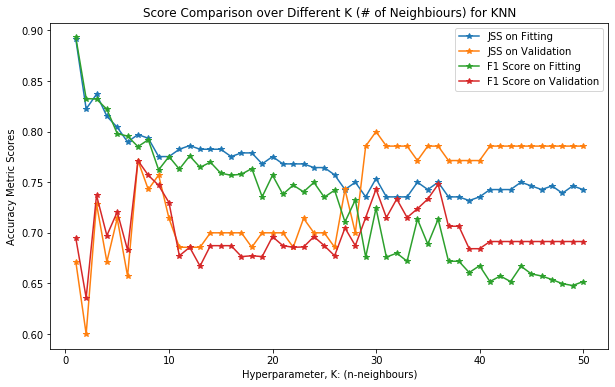

In [23]:
K=K_index
Scores_KNN_df= pd.DataFrame(list(zip(JSS_KNN_Fit, JSS_KNN_Validation, F1_KNN_Fit, F1_KNN_Validation, AS_KNN_Fit, AS_KNN_Validation)), index=K, columns=["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation",  "Accuracy Score on Fitting", "Accuracy Score on Validation"])
Scores_KNN_df[["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation"]].plot(marker='*' ,figsize=(10, 6))
plt.title("Score Comparison over Different K (# of Neighbiours) for KNN")
plt.xlabel("Hyperparameter, K: (n-neighbours)")
plt.ylabel("Accuracy Metric Scores")


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me: My Note about K Nearest Neighbout(KNN)_**</span>
### <span style="color: blue;">         **_Part 4: Validation_**</span>
For KNN, **_K_** is a very important primary hyperparameter. So, the question is: 
**_how to choose K?_**

Basis of judgement, how to choose an appropriate K.
    
(1)	We have to reject the lowest range of K value, say 1 or 2 for the given size of our data, for the following reasons at least. 
   * it causes a highly complex model: maybe more than that, 'what's the point of classification by dividing everything apart into single item isolations?'; 
   * it, likely reflecting anomalies and noises, would fail to generalize the classifications;
   * it might result in overfitting of the model.

   Overall, incorporating the lowest range of K into the KNN classification model would fail to justify the meaning of the classification, itself. 

(2)	At the same time, at the opposite end of the spectrum of K, we have to reject too large values for K because of the risk of excessive-generalization. Excessively generalizing the model is different from the overfitting. It would fail to distinguish certain characteristics underlying in the data, if the classification is too ROUGH.

(3)	Thus, we need to strike the balance between these two confronting risks. This would require human judgement and domain knowledge.
    
### <span style="color: blue;"> **_My Selection on K:_** </span>
The chart above shows the followings: 
 1. the fitting starts with very high accuracy scores for both Jaccard Similarity Scores (JSS) and F1 Score; while the testing starts from low scores.
 2. The accuracy scores for the testing set once go up high at K=7 and decline again.
 3. Then, the accuracy scores for the testing set rise around K=30.
    
I would tentatively suppose the followings:
 * The early range (1-5) would pose the overfitting risk.
 * On the other end, the later range might pose excessive generalization risk (too rough).

Overall, I can see both <span style="color: blue;">**_K=7_**</span> and <span style="color: blue;">**_K=30_**</span> as potential candidates at this stage. And I will try this model for the Evaluation to see which one gives us the better score on the Evaluation.
    
I would keep them both and compare their results on the evaluation later.
Cut a long story short, after some trials at the Evaluation stage, <span style="color: green;">**_K=30_**</span> turned out to be the better one.    
Accordingly, in the next cell, I will fit the model with <span style="color: blue;"> **_K=30_**  </span> and set the model as  <span style="color: blue;"> **_a validated model, "KNN_Validated"_**  </span>

</div>

In [24]:
#Train the model with the best K
k = 30
KNN_Validated = KNeighborsClassifier(n_neighbors= k )
KNN_V_Fit=KNN_Validated.fit(X_train , y_train)
print('validated model of KNN :', KNN_V_Fit)
y_KNN_V_prediction =KNN_V_Fit.predict(X_test)

print('prediction of the test set based on validated model :', y_KNN_V_prediction)
#KNN_GridSearchCV = KNeighborsClassifier(algorithm='brute', metric='mahalanobis', n_neighbors=5, weights='uniform')
#KNN_GridSearchCV_Fit=KNN_GridSearchCV.fit(X_train , y_train)
#KNN_GridSearchCV_Fit
                

validated model of KNN : KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')
prediction of the test set based on validated model : ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF']


# Decision Tree

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span> 
### <span style="color: blue;"> **_My Note about_**</span> <span style="color: green;">**_"Decision Trees"_**</span> 
### <span style="color: blue;"> **_Part 1: Hyperparameters for Decision Trees_**</span>

Decision Tree partitions data based on the attributes/features of datapoints into several classes.
    
Now, two hyperparameters of Decision Trees are associated with the following 2 questions:
  *  <span style="color: blue;"> **_How far does it need to partition data?:_**</span> The first question is about the depth of the level of partitioning data. 
  * <span style="color: blue;"> **_How does it choose the best attribute/feature at each partition?:_**</span> The second question is about the metric that measures the effectiveness of the choice of the attribute/feature chosen for partitioning. 
    
    For both issues, * <span style="color: blue;"> **_‘sklearn.DecisionTreeClassifier()’_**</span> has its built-in hyper-parameters options to tune the model: <span style="color: blue;">**_"max_depth" (the depth of the level of the tree)_**</span>; and  <span style="color: blue;">**_"criterion" (the disorder/impurity metric)_**</span> for the second one.

Now, using <span style="color: blue;">**_GridSearchCV_**</span>, let me have a look on possible best values for these two hyper-parameters of Decision Trees: <span style="color: blue;">**_"max_depth"_**</span> and <span style="color: blue;">**_"criterion"_**</span>. 

 * Source 1: https://datascience.stackexchange.com/questions/26776/how-to-calculate-ideal-decision-tree-depth-without-overfitting. 
 * Source 2: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# GridSearchCV to Search for the Best Parameter for the maximum depth
A = {'max_depth': np.arange(2, 10), 'criterion':['gini','entropy']}

Best_Search = GridSearchCV(DecisionTreeClassifier(), param_grid=A, cv=10)
Best_Search.fit(X_train, y_train)


print ("Best Score: {}".format(Best_Search.best_score_))
print ("Best params: {}".format(Best_Search.best_params_))


Best Score: 0.7177248677248677
Best params: {'criterion': 'entropy', 'max_depth': 3}


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_My Note about_**</span> <span style="color: green;">**_"Decision Trees"_**</span>
### <span style="color: blue;"> **_Part 2: In Search for the Best Hyperparameter: Iterate over Different Values of Hyperparameter,_**</span> <span style="color: green;">**_max_depth_**</span>

OK, **_GridSearchCV_** gave me a rough idea about the best value for the hyperparameters in question.
 * "max_depth" (the max depth level of the tree): <span style="color: blue;"> **_3_**</span> 
 * "criterion" (the disorder/impurity metric): <span style="color: blue;"> **_Entropy_**</span>

Now, I would like to focus ONLY on <span style="color: blue;"> **_max_depth (the upper boundary of the depth level of the tree)_**</span>. For "criterion" (the disorder/impurity metric), I will keep the result from GridSearchCV <span style="color: blue;">, **_Entropy_**</span>.
    
Using iteration, I would like to calculate accuracy metrics over different <span style="color: blue;"> **_max_depth_**</span>. In other words, in the next cell, I will conduct the following steps:
> Step 1) do the “fitting” of the model using the train set.
    
> Step 2) test the model on the test set, 
    
> Step 3) calculate accuracy metrics—Jaccard Similarity Score and F1 Score—of the model over different values of the primary hyperparameter, <span style="color: blue;"> **_max_depth (the upper boundary of the depth level of the tree)_**</span>, for both the train set and the test set.
    

In [26]:
# Iteration to Search for the Best Max_Depth

from sklearn import metrics

Ks = 30 #The upper limit of K for looping
K_index =np.arange(1,Ks+1) # K on X-axis for plotting
print("K_index: ", K_index)
# F1_Score for The Training Set (Fitting)
F1_DT_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_DT_Validation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_DT_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_DT_Validation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


for n in range(1,Ks+1):
    
    #Create a Decision Tree object
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    # Train the model on the training dataset
    DecTree.fit(X_train,y_train)
    yhat_DT_Fit=DecTree.predict(X_train)
    # Validation of the model on the test dataset
    yhat_DT_Validation=DecTree.predict(X_test)    
    
    #F1 Score for Fitting
    F1_DT_Fit[n-1] = " %.4f" % f1_score(y_train, yhat_DT_Fit, average='weighted') 
    #F1 Score for Validation
    F1_DT_Validation[n-1] = " %.4f" % f1_score(y_test, yhat_DT_Validation, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_DT_Fit[n-1] = jaccard_similarity_score(y_train, yhat_DT_Fit)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_DT_Validation[n-1] =jaccard_similarity_score(y_test, yhat_DT_Validation) 
    
    
print("n=: ", n)
print("F1 Score for Fitting: ", F1_DT_Fit)
print("F1 Score for Validation: ", F1_DT_Validation)
print("Validation Max of F1 Score: ", " %.4f" % F1_DT_Validation.max(), "@ MAX_DEPTH=", F1_DT_Validation.argmax()+1)
print("MAX_DEPTH of Validation Max F1 Score: ", F1_DT_Validation.argmax()+1)

print("Jaccard Similarity Score for Fitting: ", JSS_DT_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_DT_Validation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_DT_Validation.max(), "@ K=", JSS_DT_Validation.argmax()+1)
print("MAX_DEPTH of Validation Max Jaccard Similarity Score: ", JSS_DT_Validation.argmax()+1)


K_index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

n=:  30
F1 Score for Fitting:  [0.6331 0.6331 0.7574 0.7574 0.7651 0.7329 0.7529 0.7587 0.8293 0.8242
 0.832  0.8723 0.8812 0.8913 0.8981 0.907  0.9111 0.9111 0.9111 0.9111
 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111]
F1 Score for Validation:  [0.6914 0.6914 0.6446 0.6446 0.6742 0.7065 0.6979 0.6979 0.6758 0.6765
 0.6633 0.7143 0.7257 0.7415 0.7531 0.7143 0.7028 0.7143 0.7028 0.7028
 0.7028 0.7028 0.7028 0.7143 0.7028 0.7143 0.7143 0.7143 0.7143 0.7143]
Validation Max of F1 Score:   0.7531 @ MAX_DEPTH= 15
MAX_DEPTH of Validation Max F1 Score:  15
Jaccard Similarity Score for Fitting:  [0.74275362 0.74275362 0.74637681 0.74637681 0.75       0.77536232
 0.78985507 0.79710145 0.82971014 0.83695652 0.8442029  0.87318841
 0.88043478 0.89130435 0.89855072 0.9057971  0.90942029 0.90942029
 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029
 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029]
Jaccard Similarity Score for Validation:  [0.

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
 ### <span style="color: blue;">        **_My Note about_**</span> <span style="color: green;">**_Decision Trees_**</span>
 ### <span style="color: blue;">        **_Part 3: Visualize Scores over Different Values of Hyperparameter,_**</span> <span style="color: green;">**_"max_depth"_**</span>
    
Now, let's plot the Score results and visually compare them.
    
In the chart legend:
   * "Fitting" refers to "Training"
   * "Validation" refers to "Testing"

</div>

Text(0, 0.5, 'Accuracy Metric Scores')

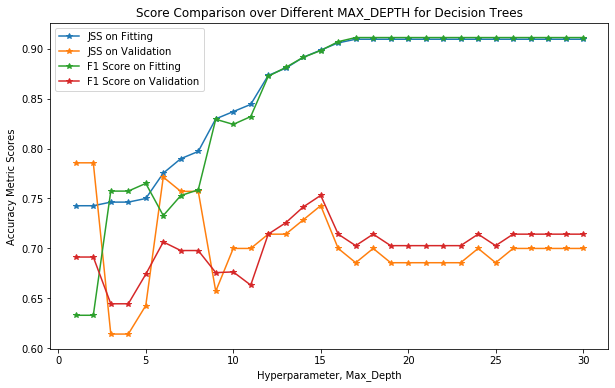

In [27]:
#Plot
Scores_DT_df= pd.DataFrame(list(zip(JSS_DT_Fit, JSS_DT_Validation, F1_DT_Fit, F1_DT_Validation)), index=K_index, columns=["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation"])
Scores_DT_df[["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation"]].plot(marker='*',figsize=(10, 6))
plt.title("Score Comparison over Different MAX_DEPTH for Decision Trees")
plt.xlabel("Hyperparameter, Max_Depth")
plt.ylabel("Accuracy Metric Scores")

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;">        **_My Note about Decision Trees_**</span>
### <span style="color: blue;">        **_Part 4: Validation_**</span>

For Decision Trees, <span style="color: blue;"> **_the depth of the tree, or max_depth_**</span> is a very important primary hyperparameter. Now, the question is: 
> Basis of judgement: how to choose <span style="color: blue;"> **_max_depth_**</span>?

The chart above provides us with the following insights.
    
 
   1. The scores for the train set (fitting) rises as max_depth increses upto 15; thereafter, they stabilize at a level.
   2. The scores for the testing set (validation):
   > * Jaccard Similarity Score registers the highest at <span style="color: red;"> **_max_depth=1_**  </span>. Nevertheless, Decision Trees at level 1 would pose <span style="color: red;"> **_the risk of underfitting_**  </span>, thus, it would not give us any insight about the classification. This also poses the risk of excess generalization.
     * F1 score also starts from a relatively high level, but drops once and bouces back again between max_depth=3 and max_depth=5.
     * Both JSS and F1 Score hit local highs at <span style="color: blue;"> **_max_depth=6_**  </span> and <span style="color: red;"> **_max_depth=15_**  </span>. Nevertheless, their values are at different level. 
     * At <span style="color: red;"> **_max_depth=15_**  </span> pose <span style="color: red;">, both JSS and F1 Score, converging at a near level, demonstrate the most consistent output at a high level. 
       
Overall, there seem to be two options that offer a good balance between the fitting and the testing results.
 > * <span style="color: blue;"> **_max_depth=6_** </span>
 > * <span style="color: blue;"> **_max_depth=15_** </span> 

### <span style="color: green;"> **_My Selection on max_depth:_** </span>

Between these two options, the question is whether the second option, <span style="color: blue;"> **_max_depth=15_**</span> poses overfitting risk. For the testing set:
 *  at <span style="color: blue;"> **_max_depth=15_**</span>, while JSS shows a lower score than its record at <span style="color: blue;"> **_max_depth=6_**</span>.
 *  F1 Score improves its score at <span style="color: blue;"> **_max_depth=15_**</span> than at <span style="color: blue;"> **_max_depth=6_**</span>.

This suggests that the scores for the testing set are not necessarily sacrificed by the improvement in the fitting of the train set at <span style="color: blue;"> **_max_depth=15_**</span>. 
    
* Thus, at this stage, I would assume that <span style="color: blue;"> **_max_depth=15_**</span> would not cause overfitting issue. 

* On the other hand, <span style="color: blue;"> **_max_depth=6_**</span> might be posing <span style="color: red;"> **_the risk of underfitting_**  </span>.

Overall, I would try both of them for the Evaluation and select the one with the better evaluation score. It further would require <span style="color: blue;">**_domain knowledge_**</span> to ensure the assumption.


Cut a long story short, as result, <span style="color: green;"> **_max_depth=15_**</span> yielded the better result than <span style="color: blue;"> **_max_depth=6_**</span>

</div>

In [28]:
#Validated Model 1: max_depth=6

DecTree_validated_1 = DecisionTreeClassifier(criterion="entropy", max_depth=6)
# Train the model on the training dataset
DecTree_V_Fit1=DecTree_validated_1.fit(X_train,y_train)
print("DecTree_validated_1 @ depth=6: ", DecTree_V_Fit1 )

#Validated Model 2: max_depth=15
DecTree_validated_2 = DecisionTreeClassifier(criterion="entropy", max_depth=15)
# Train the model on the training dataset
DecTree_V_Fit2=DecTree_validated_2.fit(X_train,y_train)
print("DecTree_validated_2 @ depth=15: ", DecTree_V_Fit2)

#prediction based on the validated model
DecTree_V_Prediction2=DecTree_validated_2.predict(X_test)
print('prediction of the test set based on the validated model: ', DecTree_V_Prediction2)



DecTree_validated_1 @ depth=6:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
DecTree_validated_2 @ depth=15:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
prediction of the test set based on the validated model:  ['PAIDOFF' 'PAIDOFF' '

In [29]:
#Visualization) 
# Install the pydotplus
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


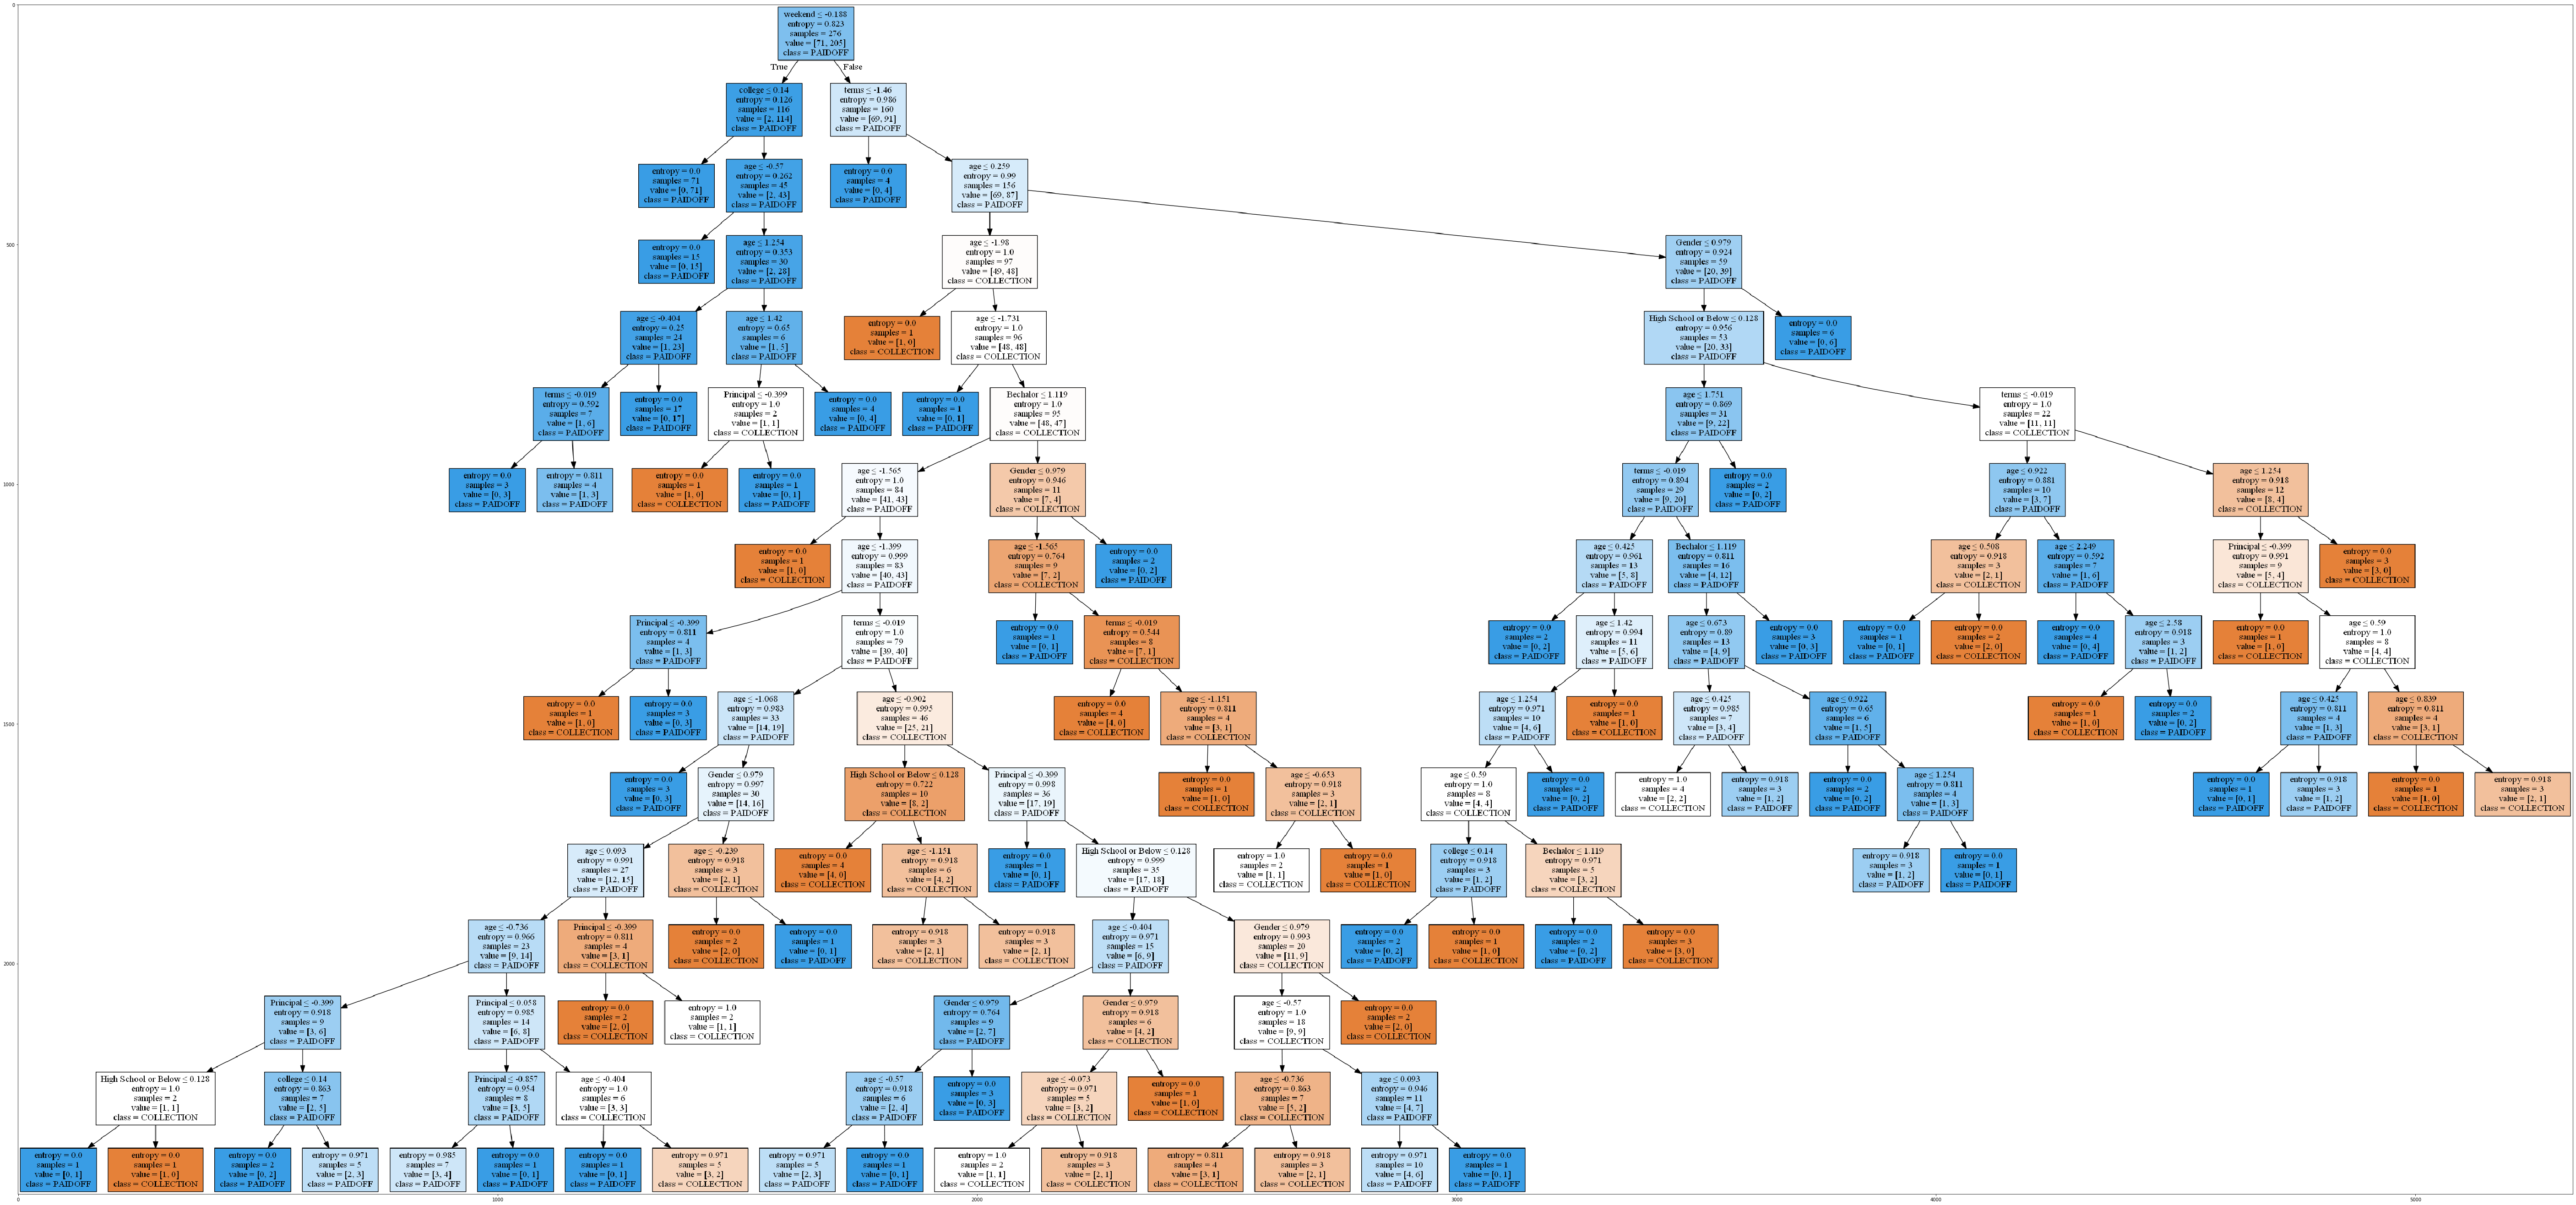

In [30]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 
dot_data = StringIO()
filename = "Loan_Tree.png"
featureNames = Feature.columns.values
targetNames = np.unique(y_train)
tree.export_graphviz(DecTree_V_Fit2,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;">        **_My Note about SVM_**</span>
### <span style="color: blue;">        **_Part 1: Optimizartion Parameters_**</span> <span style="color: green;">**_"kernel"_**</span>

SVM is a technique to conceptually map complex data to **_a high-dimensional feature space_** so that data points can be separated (classified), even when the data are **_not otherwise linearly separable_**. 

For SVM, **_kernelling_** is a very important primary feature. 
**_kernelling_** is about mapping data into a higher dimensional space.

And **_sklearn.svm.SVC_** allows us to choose the following **_kernel functions_** for fitting and validation (evaluation).

   1. Linear: 'linear'
   2. Polynomial: 'poly'
   3. Radial basis function (RBF): 'rbf'
   4. Sigmoid: 'sigmoid'
   5. Precomputed: 'precomputed'

In order to optimise the performance of SVM machine learning, it is important to compare **_sklearn.svm.SVC's_** output among different **_kernel settings_*.

First, I want to use a cross validation tool, GridSearchCV, to get a quick idea about the best kernel for the given dataset. Here is the external source for GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [31]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# GridSearchCV to find the Best Kernel
A ={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }
B = {'C': [0.1, 0.2, 0.5, 1, 10], 'gamma': [1, 0.8, 0.6, 0.5, 0.1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] }  

Best_Search = GridSearchCV(svm.SVC(), param_grid=A)
Best_Search.fit(X_train, y_train)


print ("Best Score: {}".format(Best_Search.best_score_))
print ("Best params: {}".format(Best_Search.best_params_))

Best Score: 0.7354545454545455
Best params: {'kernel': 'poly'}


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_My Note about}
### <span style="color: blue;"> **_Part 2: In Search for the Best Optimization Parameter: Iterate over Different Values of Optimization Parameter,_**</span> <span style="color: green;">**_kernel function_**</span>


Now, **_GridSearchCV_** gave us its finding: **_the best kernel function_** is **_'poly'_**, a polynomial function with the score of 0.735.

Next, let me use **_iterations_** to calcuate the validation scores ("F1 Score" and "Jaccard Similarity Score") over different **_kernel functions_**.
        
In other words, in the next cell, I will conduct the following steps:
> Step 2) do the “fitting” of the model using the train set.
    
> Step 3) test the model on the test set, 
    
> Step 4) calculate accuracy metrics—Jaccard Similarity Score and F1 Score—of the model over different values of the primary hyperparameter, <span style="color: blue;"> **_the kernel function_**</span>, for both the train set and the test set.
        

In [32]:

# Kernel Functions
Kernel_Functions=['linear', 'poly', 'rbf', 'sigmoid']

N=len(Kernel_Functions)

# F1_Score for The Training Set (Fitting)
F1_svm_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_svm_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_svm_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_svm_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Accuracy Score for the Training Set (Fitting)
AS_svm_Fit=np.zeros((N)) 
# Accuracy Score for the Testing Set (Validation)
AS_svm_Validation=np.zeros((N)) 


#Import SVM 
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

    
n = 0
for kernel_choice in Kernel_Functions:
    
    n = n + 1
    #create SVM object
#    SVM = svm.SVC(kernel=kernel_choice, C= 0.1, gamma=0.8)
    SVM = svm.SVC(kernel=kernel_choice)
    
    # Train the model to the training dataset
    SVM.fit(X_train, y_train) 
    # Fitting the Train Dataset
    y_fit_SVM=SVM.predict(X_train)
    # Predict for validation using the test dataset
    y_validate_SVM =SVM.predict(X_test)
    y_validate_SVM[:5]
    
    #F1 Score for Fitting
    F1_svm_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_SVM, average='weighted') 
    #F1 Score for Validation
    F1_svm_Validation[n-1] = " %.4f" % f1_score(y_test, y_validate_SVM, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_svm_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_SVM)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_svm_Validation[n-1] =jaccard_similarity_score(y_test, y_validate_SVM) 
    #Accuracy Score for Fitting
    #AS_svm_Fit[n-1]= metrics.accuracy_score(y_train, y_fit_SVM)
    #Accuracy Score for Validation Accuracy
    #AS_svm_Validation[n-1]= metrics.accuracy_score(y_test, y_validate_SVM)
    
    # set the counter
    
    
print(n)
print("F1 Score for Fitting: ", F1_svm_Fit)
print("F1 Score for Validation: ", F1_svm_Validation)
print("Validation Max of F1 Score: ", " %.4f" % F1_svm_Validation.max(), "@ K=", Kernel_Functions[F1_svm_Validation.argmax()])
print("Kernel of Validation Max F1 Score: ", Kernel_Functions[F1_svm_Validation.argmax()])

print("Jaccard Similarity Score for Fitting: ", JSS_svm_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_svm_Validation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_svm_Validation.max(), "@ K=", Kernel_Functions[JSS_svm_Validation.argmax()+1])
print("Kernel of Validation Max Jaccard Similarity Score: ", Kernel_Functions[JSS_svm_Validation.argmax()+1])



4
F1 Score for Fitting:  [0.6331 0.7286 0.7682 0.6427]
F1 Score for Validation:  [0.6914 0.7065 0.7276 0.6893]
Validation Max of F1 Score:   0.7276 @ K= rbf
Kernel of Validation Max F1 Score:  rbf
Jaccard Similarity Score for Fitting:  [0.74275362 0.7826087  0.7826087  0.71014493]
Jaccard Similarity Score for Validation:  [0.78571429 0.77142857 0.74285714 0.74285714]
Validation Max of Jaccard Similarity Score:   0.7857 @ K= poly
Kernel of Validation Max Jaccard Similarity Score:  poly


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
 ### <span style="color: blue;">        **_My Note about_**</span> <span style="color: green;">**_SVM_**</span>
 ### <span style="color: blue;">        Part 3: Visualize Scores over Different Values of Optimization Parameter,</span> <span style="color: green;">**_kernel_**</span>
    
Now, let's plot the Score results and visually compare them.

In the chart legend:
   * "Fitting" refers to "Training"
   * "Validation" refers to "Testing"

</div>

Text(0.5, 0, 'Optimization Parameter, kernel')

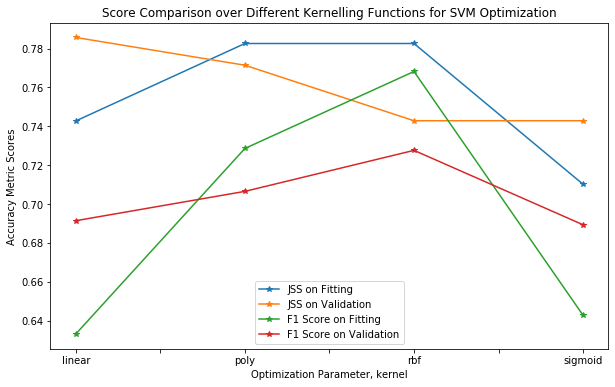

In [33]:
JSS_df= pd.DataFrame(list(zip(JSS_svm_Fit, JSS_svm_Validation, F1_svm_Fit, F1_svm_Validation, AS_svm_Fit, AS_svm_Validation)), index=Kernel_Functions, columns=["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation",  "Accuracy Score on Fitting", "Accuracy Score on Validation"])
#print(JSS_df)

JSS_df[["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation"]].plot(marker='*', figsize=(10, 6))
plt.title("Score Comparison over Different Kernelling Functions for SVM Optimization")
plt.ylabel("Accuracy Metric Scores")
plt.xlabel("Optimization Parameter, kernel")

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;">        **_My Note about_**</span> <span style="color: green;">**_SVM_**</span>
### <span style="color: blue;">        **_Part 4: Validation_**</span>

The plot above suggests the following notions among different **_kernelling functions_**.
   1. 'linear' suggests underfitting issue for both JSS and F1 Score.
   2. 'poly' generates contrasting output between JSS and F1: high scores for JSS; relatively low scores for F1 Score.
   3. 'rbf' generates balanced and consistent (converged) output between JSS and F1. 
   4. 'sigmoid' suggests underfitting issue for both JSS and F1 Score.
    
### <span style="color: blue;"> **_My Selection on 'kernel':_** </span>
    
<span style="color: red;">   The question is which one I shall chose, 'poly' or 'rbf' as the 'kernel' function.</span>
    
    
From an overall point of view, <span style="color: green;">**_'rbf'_**</span> provides a consistent balanced output, when compared with **_'poly'_**, I would select <span style="color: green;">**_'rbf'_**</span> for the **_Kernelling Function_**.

In [34]:
# Final Selection for SVM
SVM_Validated = svm.SVC(kernel='rbf')
SVM_V_fit = SVM_Validated.fit(X_train, y_train)
SVM_V_prediction = SVM_Validated.predict(X_test)

print("SMV Validated Fitting on the train set: ", SVM_V_fit)
print("prediction of the test set based on the validated model :", SVM_V_prediction)


SMV Validated Fitting on the train set:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
prediction of the test set based on the validated model : ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' '

In [35]:

A = {'C': [0.1, 0.2, 0.5, 1, 10],  
              'gamma': [1, 0.8, 0.6, 0.5, 0.1], 
              'kernel': ['rbf']}  
Best_Search = GridSearchCV(svm.SVC(), param_grid=A)
Best_Search.fit(X_train, y_train)


print ("Best Score: {}".format(Best_Search.best_score_))
print ("Best params: {}".format(Best_Search.best_params_))

Best Score: 0.7427922077922078
Best params: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


# Logistic Regression

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;">        **_My Note about_**</span> <span style="color: green;">**_Logistic Regression_**</span>
### <span style="color: blue;">        **_Part 1: Tuning: Optimization Prameter and Regularization Term_**</span>
### <span style="color: blue;">**_Optimization Parameters:_**</span> <span style="color: green;">**_Solver_**</span>

Scikit-learn's **_LogisticRegression_** uses different numerical optimizers to run logistic regression: 
 1. <span style="color: blue;">**_‘newton-cg’_**</span>: A newton method can be slow for a large data set because it calculates the second derivatives, using an exact Hessian matrix.
 2. <span style="color: blue;">**_‘lbfgs’_**</span>: Limited-memory Broyden–Fletcher–Goldfarb–Shanno approximates the second derivative matrix updates with gradient evaluations.
 3. <span style="color: blue;">**_‘liblinear’_**</span>: "Library for Large Linear Classification" uses a coordinate descent algorithm, which moves toward the minimum in one direction at a time. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest. 
 4. <span style="color: blue;">**_‘sag’_**</span>: Stochastic Average Gradient descent. Fast for big datasets. 
 5. <span style="color: blue;">**_‘saga’_**</span>: Extension of sag that also allows for L1 regularization. Should generally train faster than sag.

### Sources about Solver: 
   1. https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
   2. https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406


### <span style="color: blue;">**_Regularization Terms :_**</span> <span style="color: green;">**_C_**</span>

Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models. 

 * Source 1: https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c
 * Source 2: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization.

Now lets fit our model with train set:
First, I want to use a cross validation tool, GridSearchCV, to identify the best kernel for the given dataset. Here is the external source for GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# GridSearchCV to find the Best Kernel
A={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': [0.01, 0.1, 0.5, 1, 2, 3, 4]}
B= {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.01, 0.1, 0.5, 1, 2, 3, 4]}
C={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
Best_Search = GridSearchCV(LogisticRegression(), param_grid=B)
Best_Search.fit(X_train, y_train)


print ("Best Score: {}".format(Best_Search.best_score_))
print ("Best params: {}".format(Best_Search.best_params_))

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Best Score: 0.75
Best params: {'C': 0.5, 'solver': 'newton-cg'}


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_My Note about "Logistic Regression"_**</span>
### <span style="color: blue;"> **_Part 2: Model Tuning for the Best Hyperparameter: Iterate over Different Values of Hyperparameter, solver_**</span>


Now, **_GridSearchCV_** gave us its finding, with many lines of Convergence Warnings:
 * Best Score: 0.75
 * Best params: {'C': 0.5, 'solver': 'newton-cg'}
 
Now, I would like to search for the best solver through iteration over different solver.
        
In other words, in the next cell, I will conduct the following steps:
> Step 2) do the “fitting” of the model using the train set.
    
> Step 3) test the model on the test set, 
    
> Step 4) calculate accuracy metrics—<span style="color: blue;">**_Jaccard Similarity Score, F1 Score,_**</span> and <span style="color: green;">**_Log Loss_**</span>—of the model over different values of the primary hyperparameter, <span style="color: blue;"> **_solver_**</span>, for both the train set and the test set.
        


In [37]:

# Solver
optimization=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

N=len(optimization)

# F1_Score for The Training Set (Fitting)
F1_LR_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_LR_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_LR_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_LR_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Log Loss Score for the Training Set (Fitting)
Log_LR_Fit=np.zeros((N)) 
# Log Loss Score for the Testing Set (Validation)
Log_LR_Validation=np.zeros((N)) 


#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

n = 0
for opt in optimization:
    
    # Create Logistic Regression Object
    LR = LogisticRegression(C=0.5, solver=opt)
#    LR = LogisticRegression(solver=opt)
     
    # Train the model to the training dataset
    LR.fit(X_train, y_train)
    
    # Fitting the Train Dataset
    y_fit_LR=LR.predict(X_train)
    y_fit_LR_prob = LR.predict_proba(X_train)
    # Predict for validation using the test dataset
    y_validate_LR =LR.predict(X_test)
    y_validate_LR_prob = LR.predict_proba(X_test)
    
    #F1 Score for Fitting
    F1_LR_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_LR, average='weighted') 
    #F1 Score for Validation
    F1_LR_Validation[n-1] = " %.4f" % f1_score(y_test, y_validate_LR, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_LR_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_LR)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_LR_Validation[n-1] =jaccard_similarity_score(y_test, y_validate_LR) 
    #Log Loss Score for Fitting
    Log_LR_Fit[n-1]= log_loss(y_train, y_fit_LR_prob)
    #Log Loss Score for Validation Accuracy
    Log_LR_Validation[n-1]= log_loss(y_test, y_validate_LR_prob)
    
    # set the counter
    n = n + 1
    
print(n)
print("F1 Score for Fitting: ", F1_LR_Fit)
print("F1 Score for Validation: ", F1_LR_Validation)
print("Validation Max of F1 Score: ", " %.4f" % F1_LR_Validation.max(), "@ solver=", optimization[F1_LR_Validation.argmax()])
print("Best Optimization of Validation Max F1 Score: ", optimization[F1_LR_Validation.argmax()])

print("Jaccard Similarity Score for Fitting: ", JSS_LR_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_LR_Validation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_LR_Validation.max(), "@ solver=", optimization[JSS_LR_Validation.argmax()])
print("Best Optimization of Validation Max Jaccard Similarity Score: ", optimization[JSS_LR_Validation.argmax()])

print("Log Loss for Fitting: ", Log_LR_Fit)
print("Log Loss for Validation: ", Log_LR_Validation)
print("Validation Min of Log Loss: ", " %.4f" % Log_LR_Validation.min(), "@ solver=", optimization[Log_LR_Validation.argmin()])
print("Best Optimization of Validation Min Log Loss: ", optimization[Log_LR_Validation.argmin()])


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


5
F1 Score for Fitting:  [0.7271 0.7399 0.7271 0.7271 0.7271]
F1 Score for Validation:  [0.7048 0.6954 0.7048 0.7048 0.7048]
Validation Max of F1 Score:   0.7048 @ solver= newton-cg
Best Optimization of Validation Max F1 Score:  newton-cg
Jaccard Similarity Score for Fitting:  [0.75724638 0.76449275 0.75724638 0.75724638 0.75724638]
Jaccard Similarity Score for Validation:  [0.74285714 0.72857143 0.74285714 0.74285714 0.74285714]
Validation Max of Jaccard Similarity Score:   0.7429 @ solver= newton-cg
Best Optimization of Validation Max Jaccard Similarity Score:  newton-cg
Log Loss for Fitting:  [0.42232736 0.42443281 0.42232759 0.42233077 0.42232743]
Log Loss for Validation:  [0.49472847 0.49590638 0.49472587 0.49469206 0.4947275 ]
Validation Min of Log Loss:   0.4947 @ solver= sag
Best Optimization of Validation Min Log Loss:  sag


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
 ### <span style="color: blue;">        **_My Note about_**</span> <span style="color: green;"> **_Logistic Regression_**</span>
 ### <span style="color: blue;">        Part 3: Visualize Scores over Different Values of Hyperparameter,</span> <span style="color: green;"> **_kernel_**</span>
    
Now, let's plot the Score results and visually compare them.

In the chart legend:
   * "Fitting" refers to "Training"
   * "Validation" refers to "Testing"

</div>

No handles with labels found to put in legend.


Text(0.5, 0, 'Optimization, solver')

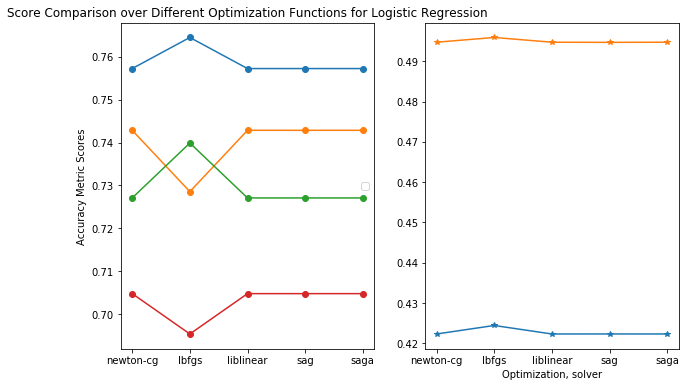

In [38]:
LR_Validation_df= pd.DataFrame(list(zip(JSS_LR_Fit, JSS_LR_Validation, F1_LR_Fit, F1_LR_Validation)), index=optimization, columns=["JSS on Fitting", "JSS on Validation", "F1 Score on Fitting", "F1 Score on Validation"])
LR_Validation_sub=pd.DataFrame(list(zip(Log_LR_Fit, Log_LR_Validation)), index=optimization, columns=["Log Loss on Fitting", "Log Loss on Validation"])

plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.plot(LR_Validation_df, marker='o')
plt.title("Score Comparison over Different Optimization Functions for Logistic Regression")
plt.ylabel("Accuracy Metric Scores")
plt.legend(loc='right')

plt.subplot(1,2,2)
plt.plot(LR_Validation_sub, marker='*')

plt.xlabel("Optimization, solver")


<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;">        **_My Note about Logistic Regression_**</span>
### <span style="color: blue;">        **_Part 4: Validation_**</span>

The plot above suggests that there is not much notable difference among different **_solvers_**. Nevertheless, 'lbfgs' demonstrates minor disadvantages to the rest.
   1. both <span style="color: blue;">**_JSS and F1 Score_**</span> suggest minor overfitting issue for 'lbfgs'.
   2. **_Log Loss_** is at minimum with <span style="color: green;">**_'sag'_**</span>.
   
### <span style="color: blue;"> **_My Selection on solver for Logistic Regression:_** </span>
    
Overall, I would choose 'sag' for its advantage on Log Loss, since for the rest it is as good as the others.
        
In the next cell, I would reflect <span style="color: green;"> **_'sag'_**</span>. for the **_solver_**.

In [39]:
# Define the Logistic Regression Object 
#     with the selected hyperparameters after the validation

LR_validated = LogisticRegression(C=0.5, solver="sag")
LR_V_fit =LR_validated.fit(X_train, y_train)
print('Validated Logistic Regression Model: ', LR_V_fit)
LR_V_prediction =LR_validated.predict(X_test)
print('Prediction of the test set based on the validated model: ', LR_V_prediction)  

Validated Logistic Regression Model:  LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
Prediction of the test set based on the validated model:  ['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PA

<div class="alert alert-block alert-info">
    
### <span style="color: blue;"> **_Read_Me:_**</span>
### <span style="color: blue;"> **_The regularization parameter, C:_**</span>
The regularization parameter C is defined as follows: 
Parameter C = 1/λ.
1. Lambda (λ) controls the trade-off between the two ends of the value of λ:
  * Too small λ reduces the regularization strength to allow the model to increase it's complexity as much as it wants. A too small λ would cause ‘overfit risk’.
  * Too large λ enhances the regularization strength to keep the model simple. A too large λ would cause ‘underfit risk’. 
2. Parameter C, the inverse of λ, will work the other way around. 
  * For values too small of C, we increase the regularization strength which will create simple models which underfit the data.
  * For values too big of C, we low the power of regularization which implies the model is allowed to increase it's complexity, and therefore, overfit the data.

In [40]:
data_points = 10 # 
C_para = np.linspace(0.1,1,data_points) # Generate datapoints for C

N=data_points
# F1_Score for The Training Set (Fitting)
F1_LR_Ncg_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
F1_LR_LibL_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
F1_LR_SAG_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
F1_LR_SAGA_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_LR_Ncg_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
F1_LR_LibL_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
F1_LR_SAG_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
F1_LR_SAGA_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation

# Jaccard Similarity_Score for The Training Set (Fitting)
JSS_LR_Ncg_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
JSS_LR_LibL_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
JSS_LR_SAG_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
JSS_LR_SAGA_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
JSS_LR_Ncg_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
JSS_LR_LibL_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
JSS_LR_SAG_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
JSS_LR_SAGA_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation

# Log Loss for The Training Set (Fitting)
Log_LR_Ncg_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
Log_LR_LibL_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
Log_LR_SAG_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
Log_LR_SAGA_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
Log_LR_Ncg_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
Log_LR_LibL_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
Log_LR_SAG_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation
Log_LR_SAGA_Validation = np.zeros((N)) #np.array to reserve F1 Score for Validation


#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

c = 1 # the counter for C
for cp in C_para:
    
    # Create Logistic Regression Object
    LR_Ncg = LogisticRegression(C=cp, solver='newton-cg')
    LR_LibL = LogisticRegression(C=cp, solver='liblinear')
    LR_SAG = LogisticRegression(C=cp, solver='sag')
    LR_SAGA = LogisticRegression(C=cp, solver='saga')
        
    # Train the model to the training dataset
    LR_Ncg.fit(X_train, y_train)
    LR_LibL.fit(X_train, y_train)
    LR_SAG.fit(X_train, y_train)
    LR_SAGA.fit(X_train, y_train)
    
    # Fitting the Train Dataset
        
    y_fit_LR_Ncg=LR_Ncg.predict(X_train)
    y_fit_LR_Ncg_prob = LR_Ncg.predict_proba(X_train)
    y_fit_LR_LibL=LR_LibL.predict(X_train)
    y_fit_LR_LibL_prob = LR_LibL.predict_proba(X_train)
    y_fit_LR_SAG=LR_SAG.predict(X_train)
    y_fit_LR_SAG_prob = LR_SAG.predict_proba(X_train)
    y_fit_LR_SAGA=LR_SAGA.predict(X_train)
    y_fit_LR_SAGA_prob = LR_SAGA.predict_proba(X_train)
    
    # Predict for validation using the test dataset
    y_validate_LR_Ncg =LR_Ncg.predict(X_test)
    y_validate_LR_Ncg_prob = LR_Ncg.predict_proba(X_test)
    y_validate_LR_LibL =LR_LibL.predict(X_test)
    y_validate_LR_LibL_prob = LR_LibL.predict_proba(X_test)
    y_validate_LR_SAG =LR_SAG.predict(X_test)
    y_validate_LR_SAG_prob = LR_SAG.predict_proba(X_test)
    y_validate_LR_SAGA =LR_SAGA.predict(X_test)
    y_validate_LR_SAGA_prob = LR_SAGA.predict_proba(X_test)
        
    
        
    # F1_Score for The Training Set (Fitting)
    F1_LR_Ncg_Fit[c-1] = f1_score(y_train, y_fit_LR_Ncg, average='weighted') 
    F1_LR_LibL_Fit[c-1] = f1_score(y_train, y_fit_LR_LibL, average='weighted') 
    F1_LR_SAG_Fit[c-1] = f1_score(y_train, y_fit_LR_SAG, average='weighted')
    F1_LR_SAGA_Fit[c-1] = f1_score(y_train, y_fit_LR_SAGA, average='weighted') 
    # F1_Score for the Testing Set (Validation)
    F1_LR_Ncg_Validation[c-1] = f1_score(y_test, y_validate_LR_Ncg, average='weighted') 
    F1_LR_LibL_Validation[c-1] = f1_score(y_test, y_validate_LR_LibL, average='weighted') 
    F1_LR_SAG_Validation[c-1] = f1_score(y_test, y_validate_LR_SAG, average='weighted') 
    F1_LR_SAGA_Validation[c-1] = f1_score(y_test, y_validate_LR_SAGA, average='weighted') 

    # Jaccard Similarity_Score for The Training Set (Fitting)
    JSS_LR_Ncg_Fit[c-1] = jaccard_similarity_score(y_train, y_fit_LR_Ncg)
    JSS_LR_LibL_Fit[c-1] = jaccard_similarity_score(y_train, y_fit_LR_LibL)
    JSS_LR_SAG_Fit[c-1] = jaccard_similarity_score(y_train, y_fit_LR_SAG)
    JSS_LR_SAGA_Fit[c-1] = jaccard_similarity_score(y_train, y_fit_LR_SAGA)
    # Jaccard Similarity_Score for the Testing Set (Validation)
    JSS_LR_Ncg_Validation[c-1] =jaccard_similarity_score(y_test, y_validate_LR_Ncg)
    JSS_LR_LibL_Validation[c-1] =jaccard_similarity_score(y_test, y_validate_LR_LibL)
    JSS_LR_SAG_Validation[c-1] =jaccard_similarity_score(y_test, y_validate_LR_SAG)
    JSS_LR_SAGA_Validation[c-1] =jaccard_similarity_score(y_test, y_validate_LR_SAGA)

    # Log Loss for The Training Set (Fitting)
    Log_LR_Ncg_Fit[c-1]= log_loss(y_train, y_fit_LR_Ncg_prob)
    Log_LR_LibL_Fit[c-1]= log_loss(y_train, y_fit_LR_LibL_prob)
    Log_LR_SAG_Fit[c-1]= log_loss(y_train, y_fit_LR_SAG_prob) 
    Log_LR_SAGA_Fit[c-1]= log_loss(y_train, y_fit_LR_SAGA_prob)
    # F1_Score for the Testing Set (Validation)
    Log_LR_Ncg_Validation[c-1]= log_loss(y_test, y_validate_LR_Ncg_prob)
    Log_LR_LibL_Validation[c-1]= log_loss(y_test, y_validate_LR_LibL_prob)
    Log_LR_SAG_Validation[c-1]= log_loss(y_test, y_validate_LR_SAG_prob)
    Log_LR_SAGA_Validation[c-1]= log_loss(y_test, y_validate_LR_SAGA_prob)    
    
    # set the counter
    c = c + 1
    
#print(c)
#print("F1 Score for Fitting: ", F1_LR_Fit)
#print("F1 Score for Validation: ", F1_LR_Validation)
#print("Validation Max of F1 Score: ", " %.4f" % F1_LR_Validation.max(), "@ solver=", optimization[F1_LR_Validation.argmax()])
#print("Best Optimization of Validation Max F1 Score: ", optimization[F1_LR_Validation.argmax()])

#print("Jaccard Similarity Score for Fitting: ", JSS_LR_Fit)
#print("Jaccard Similarity Score for Validation: ", JSS_LR_Validation)
#print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_LR_Validation.max(), "@ solver=", optimization[JSS_LR_Validation.argmax()])
#print("Best Optimization of Validation Max Jaccard Similarity Score: ", optimization[JSS_LR_Validation.argmax()])

#print("Log Loss for Fitting: ", Log_LR_Fit)
#print("Log Loss for Validation: ", Log_LR_Validation)
#print("Validation Min of Log Loss: ", " %.4f" % Log_LR_Validation.min(), "@ solver=", optimization[Log_LR_Validation.argmin()])
#print("Best Optimization of Validation Min Log Loss: ", optimization[Log_LR_Validation.argmin()])


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

In [41]:
#New
optimization=['newton-cg', 'liblinear', 'sag', 'saga']
LR_Ncg_Validation_df= pd.DataFrame(list(zip(JSS_LR_Ncg_Fit, JSS_LR_Ncg_Validation, F1_LR_Ncg_Fit, F1_LR_Ncg_Validation)), index=C_para, columns=["JSS on Ncg Fitting", "JSS on Ncg Validation", "F1 Score on Ncg Fitting", "F1 Score on Ncg Validation"])
LR_Ncg_Validation_sub=pd.DataFrame(list(zip(Log_LR_Ncg_Fit, Log_LR_Ncg_Validation)), index=C_para, columns=["Log Loss on Ncg Fitting", "Log Loss on Ncg Validation"])

LR_LibL_Validation_df= pd.DataFrame(list(zip(JSS_LR_LibL_Fit, JSS_LR_LibL_Validation, F1_LR_LibL_Fit, F1_LR_LibL_Validation)), index=C_para, columns=["JSS on LibL Fitting", "JSS on LibL Validation", "F1 Score on LibL Fitting", "F1 Score on LibL Validation"])
LR_LibL_Validation_sub=pd.DataFrame(list(zip(Log_LR_LibL_Fit, Log_LR_LibL_Validation)), index=C_para, columns=["Log Loss on LibL Fitting", "Log Loss on LibL Validation"])

LR_SAG_Validation_df= pd.DataFrame(list(zip(JSS_LR_SAG_Fit, JSS_LR_SAG_Validation, F1_LR_SAG_Fit, F1_LR_SAG_Validation)), index=C_para, columns=["JSS on SAG Fitting", "JSS on SAG Validation", "F1 Score on SAG Fitting", "F1 Score on SAG Validation"])
LR_SAG_Validation_sub=pd.DataFrame(list(zip(Log_LR_SAG_Fit, Log_LR_SAG_Validation)), index=C_para, columns=["Log Loss on SAG Fitting", "Log Loss on SAG Validation"])

LR_SAGA_Validation_df= pd.DataFrame(list(zip(JSS_LR_SAGA_Fit, JSS_LR_SAGA_Validation, F1_LR_SAGA_Fit, F1_LR_SAGA_Validation)), index=C_para, columns=["JSS on SAGA Fitting", "JSS on SAGA Validation", "F1 Score on SAGA Fitting", "F1 Score on SAGA Validation"])
LR_SAGA_Validation_sub=pd.DataFrame(list(zip(Log_LR_SAGA_Fit, Log_LR_SAGA_Validation)), index=C_para, columns=["Log Loss on SAGA Fitting", "Log Loss on SAGA Validation"])


C:\Users\msugi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001BE03994048>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
C:\Users\msugi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001BE0399C508>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if __name__ == '__main__':
C:\Users\msugi\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000001BE0399CA08>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists

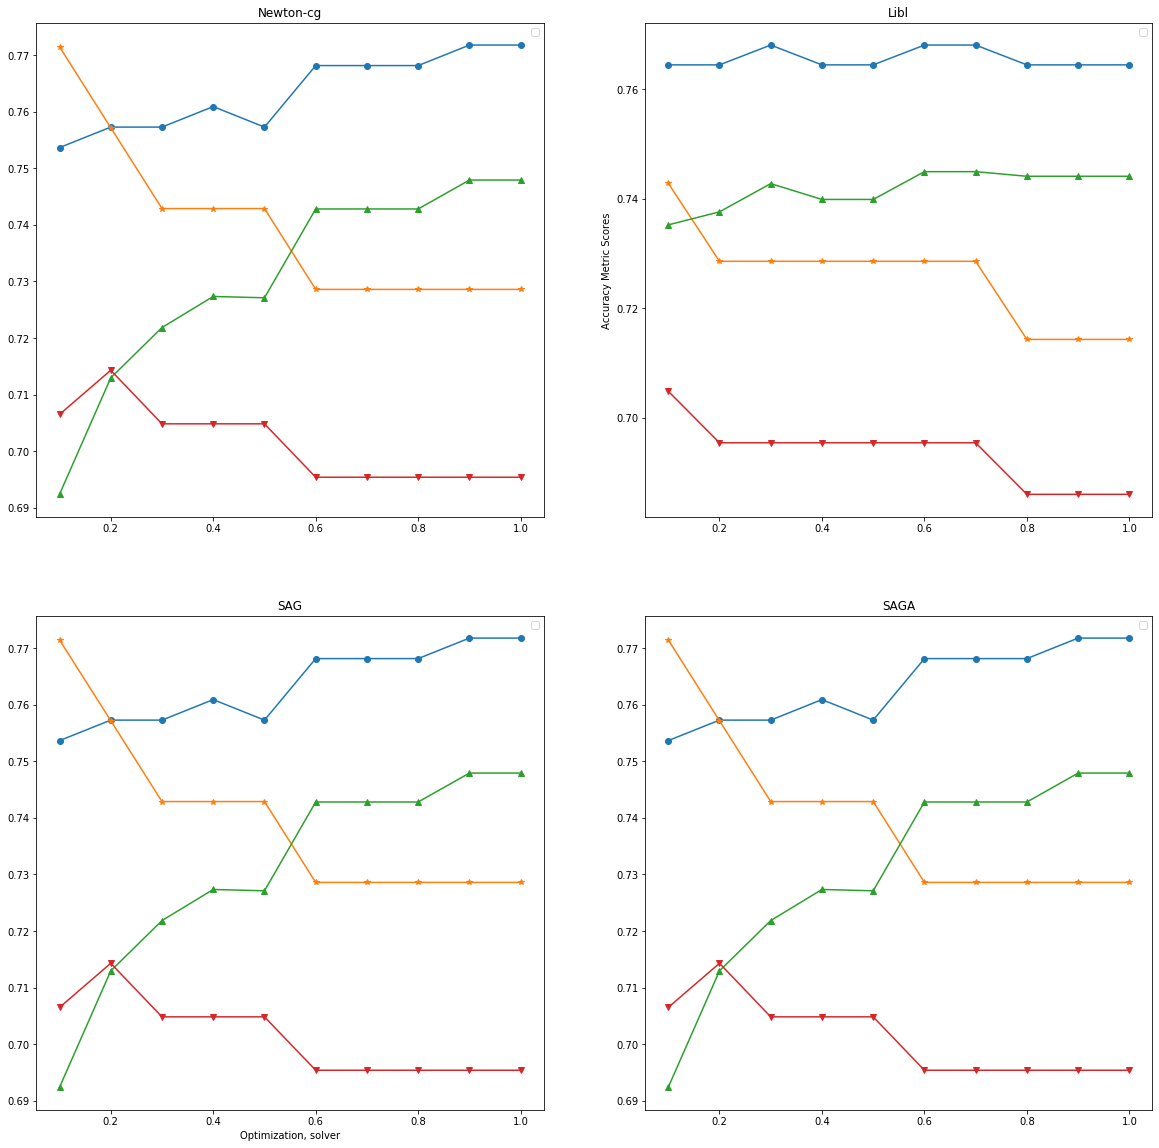

In [42]:
plt.figure(figsize=(20, 20))
plt.title("Score Comparison over Different Optimization Functions for Logistic Regression")
plt.subplot(2,2,1)
ncg_JSS_F = plt.plot(LR_Ncg_Validation_df["JSS on Ncg Fitting"], marker='o')
ncg_JSS_V = plt.plot(LR_Ncg_Validation_df["JSS on Ncg Validation"], marker='*')
ncg_F1_F = plt.plot(LR_Ncg_Validation_df["F1 Score on Ncg Fitting"], marker='^')
ncg_F1_V =plt.plot(LR_Ncg_Validation_df["F1 Score on Ncg Validation"], marker='v')
plt.title("Newton-cg")
plt.legend([ncg_JSS_F, ncg_JSS_V,ncg_F1_F, ncg_F1_V ], ["JSS on Newton-cg Fitting", "JSS on Newton-cg on Prediction", "F1 on Newton-cg Fitting", "F1 on Newton-cg on Prediction"])

plt.subplot(2,2,2)
libl_JSS_F = plt.plot(LR_LibL_Validation_df["JSS on LibL Fitting"], marker='o')
libl_JSS_V = plt.plot(LR_LibL_Validation_df["JSS on LibL Validation"], marker='*')
libl_F1_F = plt.plot(LR_LibL_Validation_df["F1 Score on LibL Fitting"], marker='^')
libl_F1_V =plt.plot(LR_LibL_Validation_df["F1 Score on LibL Validation"], marker='v')
plt.title("Libl")
plt.legend([libl_JSS_F, libl_JSS_V,libl_F1_F, libl_F1_V ], ["JSS on LibL Fitting", "JSS on LibL on Prediction", "F1 on LibL Fitting", "F1 on LibL on Prediction"])
plt.ylabel("Accuracy Metric Scores")

plt.subplot(2,2,3)
sag_JSS_F = plt.plot(LR_SAG_Validation_df["JSS on SAG Fitting"], marker='o')
sag_JSS_V = plt.plot(LR_SAG_Validation_df["JSS on SAG Validation"], marker='*')
sag_F1_F = plt.plot(LR_SAG_Validation_df["F1 Score on SAG Fitting"], marker='^')
sag_F1_V =plt.plot(LR_SAG_Validation_df["F1 Score on SAG Validation"], marker='v')
plt.title("SAG")
plt.legend([sag_JSS_F, sag_JSS_V,sag_F1_F, sag_F1_V ], ["JSS on SAG Fitting", "JSS on SAG on Prediction", "F1 on SAG Fitting", "F1 on SAG on Prediction"])
plt.xlabel("Optimization, solver")

plt.subplot(2,2,4)
saga_JSS_F = plt.plot(LR_SAGA_Validation_df["JSS on SAGA Fitting"], marker='o')
saga_JSS_V = plt.plot(LR_SAGA_Validation_df["JSS on SAGA Validation"], marker='*')
saga_F1_F = plt.plot(LR_SAGA_Validation_df["F1 Score on SAGA Fitting"], marker='^')
saga_F1_V =plt.plot(LR_SAGA_Validation_df["F1 Score on SAGA Validation"], marker='v')
plt.title("SAGA")
plt.legend([saga_JSS_F, saga_JSS_V,saga_F1_F, saga_F1_V ], ["JSS on SAGA Fitting", "JSS on SAGA on Prediction", "F1 on SAGA Fitting", "F1 on SAGA on Prediction"])



#plt.subplot(2,2,4)
#ncg_sub=plt.plot(LR_Ncg_Validation_sub, marker='o')
#libl_sub = plt.plot(LR_LibL_Validation_sub, marker='*')
#sag_sub = plt.plot(LR_SAG_Validation_sub, marker='v')
#saga_sub = plt.plot(LR_SAGA_Validation_sub, marker='^')
#plt.legend(loc="center")

#plt.legend([ncg, libl, sag, saga, ncg_sub, libl_sub, sag_sub, saga_sub], ["ncg", "libl", "sag", "saga", "ncg_sub", "libl_sub", "sag_sub", "saga_sub"], loc="lower center")




No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0, 'Optimization, solver')

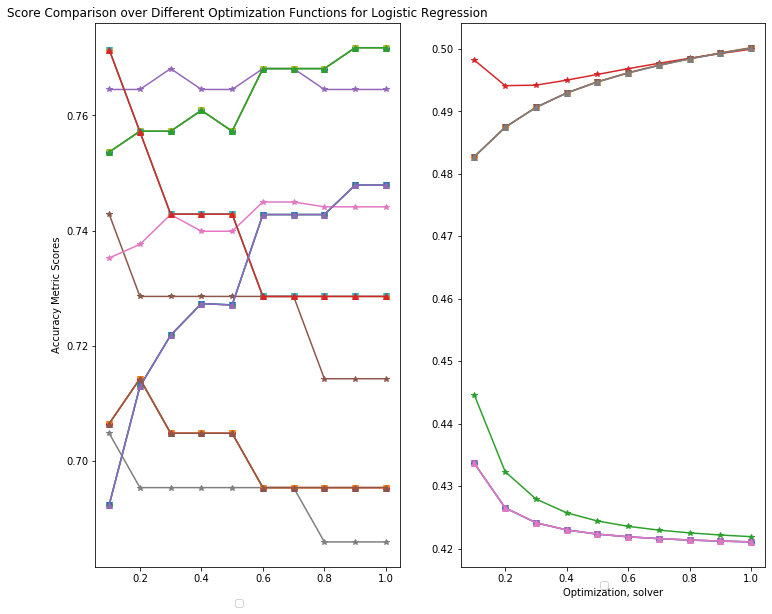

In [43]:
fig=plt.figure(figsize=(12, 10))
ax=plt.subplot(1,2,1)
ax.plot(LR_Ncg_Validation_df, marker='o')
ax.plot(LR_LibL_Validation_df, marker='*')
ax.plot(LR_SAG_Validation_df, marker='v')
ax.plot(LR_SAGA_Validation_df, marker='^')
ax.legend(loc="upper right", bbox_to_anchor=(0.5, -0.05))

plt.title("Score Comparison over Different Optimization Functions for Logistic Regression")
plt.ylabel("Accuracy Metric Scores")

ax1=plt.subplot(1,2,2)
ax1.plot(LR_Ncg_Validation_sub, marker='o')
ax1.plot(LR_LibL_Validation_sub, marker='*')
ax1.plot(LR_SAG_Validation_sub, marker='v')
ax1.plot(LR_SAGA_Validation_sub, marker='^')
ax1.legend(loc="lower right", bbox_to_anchor=(0.5, -0.05))
plt.xlabel("Optimization, solver")

# Model Evaluation using Test set

In [44]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [45]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [46]:
!pip install wget
import wget
wget.download("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv", "loan_test.csv")


100% [................................................................................] 3642 / 3642

'loan_test (13).csv'

### Load Test set for evaluation 

In [47]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [48]:
# Data Preparation
# Convert DateTime Object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
# Convert Date into Day of Week using  Pandas.Series.dt.dayofweek¶
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
# Flag weekends!
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# Convert the Gender in numeric value
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
## Convert the Loan Status to numeric value: test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

# Select Features for the Analysis
Feature = test_df[['Principal','terms','age','Gender','weekend']]
# Breakdown "Education Flag"
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
# Define XT as the testing Features 
XT=Feature
XT[:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [49]:
#Normalize the Feature 
XTN= preprocessing.StandardScaler().fit(XT).transform(XT)
print("Normalized Features[first 5 Observations]: ",  XTN[0:5])
# Actual Y
YT = test_df["loan_status"]
print("Actual Target[first 5 Observations]", YT[:5])

Normalized Features[first 5 Observations]:  [[ 0.49362588  0.92844966  3.05981865  1.97714211 -1.30384048  2.39791576
  -0.79772404 -0.86135677]
 [-3.56269116 -1.70427745  0.53336288 -0.50578054  0.76696499 -0.41702883
  -0.79772404 -0.86135677]
 [ 0.49362588  0.92844966  1.88080596  1.97714211  0.76696499 -0.41702883
   1.25356634 -0.86135677]
 [ 0.49362588  0.92844966 -0.98251057 -0.50578054  0.76696499 -0.41702883
  -0.79772404  1.16095912]
 [-0.66532184 -0.78854628 -0.47721942 -0.50578054  0.76696499  2.39791576
  -0.79772404 -0.86135677]]
Actual Target[first 5 Observations] 0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object


In [50]:


# Prediction by the validated "KNN_Loan" of K-Means Nearest Neighbour
YHAT_KNN = KNN_V_Fit.predict(XTN)
#KNN_V_Fit
# Perdiction by the validated "DecTree" of Decision Trees
#YHAT_DT=DecTree_V_Fit1.predict(XTN)
YHAT_DT=DecTree_V_Fit2.predict(XTN)
# Prediction by the validated "SVM" of SVM
YHAT_SVM=SVM_V_fit.predict(XTN)
# Prediction by the validated "LR" of Logistic Regression
YHAT_LR=LR_V_fit.predict(XTN)
YHAT_LR_PROB = LR_V_fit.predict_proba(XTN)
print("K-Means Nearest Neighbour Prediction: ", YHAT_KNN[:3])
print("Decision Tree Prediction: ", YHAT_DT[:3])
print("SVM Prediction: ", YHAT_SVM[:3])
print("Logistic Regression Point Estimator Prediction: ", YHAT_LR[:3])
print("Logistic Regression Probability Prediction: ", YHAT_LR_PROB[:3])

K-Means Nearest Neighbour Prediction:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Decision Tree Prediction:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF']
SVM Prediction:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Logistic Regression Point Estimator Prediction:  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF']
Logistic Regression Probability Prediction:  [[0.00880344 0.99119656]
 [0.29984149 0.70015851]
 [0.24819649 0.75180351]]


In [51]:
#Jaccard Similarity Score (JSS)
#from sklearn.metrics import jaccard_similarity_score
# JSS for KNN
JSS_KNN=jaccard_similarity_score(YT, YHAT_KNN)
# JSS for Decision Trees
JSS_DT=jaccard_similarity_score(YT, YHAT_DT)
# JSS for SVM
JSS_SVM=jaccard_similarity_score(YT, YHAT_SVM)
# JSS for Logistic Regression
JSS_LR=jaccard_similarity_score(YT, YHAT_LR)

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [52]:

#F1-Score (F1S)
# F1S for KNN
F1S_KNN=metrics.f1_score(YT, YHAT_KNN, average='weighted')
# F1S for Decision Trees
F1S_DT=metrics.f1_score(YT, YHAT_DT, average='weighted')
# F1S for SVM
F1S_SVM=metrics.f1_score(YT, YHAT_SVM, average='weighted')
# F1S for Logistic Regression
F1S_LR=metrics.f1_score(YT, YHAT_LR, average='weighted')

In [53]:
# Log Loss (LL)
from sklearn.metrics import log_loss
LL_KNN=log_loss(YT, YHAT_LR_PROB)

In [54]:
# Report
print("Algorithm          :" , 'Jaccard ' , 'F1-Score' , 'LogLoss          ')
print("KNN                :", " %.4f" %  JSS_KNN, " %.4f" % F1S_KNN, "  N/A")
print("Decision Trees     :", " %.4f" %  JSS_DT, " %.4f" % F1S_DT, "  N/A")
print("SVM                :", " %.4f" %  JSS_SVM, " %.4f" % F1S_SVM, "  N/A")
print("Logistic Regression:", " %.4f" %  JSS_LR, " %.4f" % F1S_LR,  "  %.4f" % LL_KNN)


Algorithm          : Jaccard  F1-Score LogLoss          
KNN                :  0.7963  0.7705   N/A
Decision Trees     :  0.7222  0.7253   N/A
SVM                :  0.7963  0.7584   N/A
Logistic Regression:  0.7593  0.6718   0.4705


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7963  | 0.7705   | NA      |
| Decision Tree      | 0.7222  | 0.7253   | NA      |
| SVM                | 0.7963  | 0.7584   | NA      |
| LogisticRegression | 0.7593  | 0.6718   | 0.4705  |

<div class="alert alert-block alert-success">
    
### Read_Me: <span style="color: blue;"> **_POST-Project "Evaluation Review: Part 1"_**</span>
###  KNN Model: Tuning of Hyperparameter, K
</div>

In [55]:
#{'algorithm': 'brute', 'metric': 'mahalanobis', 'n_neighbors': 5, 'weights': 'uniform'}

from sklearn import metrics
Ks = 50 #The upper limit of K for looping
K_index =np.arange(1,Ks+1) # K on X-axis for plotting
print("K_index: ", K_index)
# F1_Score for The Training Set (Fitting)
F1_KNN_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_KNN_Evaluation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_KNN_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_KNN_Evaluation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Accuracy Score for the Training Set (Fitting)
AS_KNN_Fit=np.zeros((Ks)) 
# Accuracy Score for the Testing Set (Validation)
AS_KNN_Evaluation=np.zeros((Ks)) 

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

for n in range(1,Ks+1):    
    
    #Train Model and Predict  
    #create KNN object
    KNN = KNeighborsClassifier(n_neighbors = n, algorithm='brute', metric='mahalanobis', weights='uniform')
    # Train the model to the training dataset
    KNN.fit(X_train,y_train)
    # Fitting the Train Dataset
    y_fit_KNN=KNN.predict(X_train)
    
    # Predict for validation using the test dataset
    y_Evaluation_KNN =KNN.predict(XTN)
        
    #F1 Score for Fitting
    F1_KNN_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_KNN, average='weighted') 
    #F1 Score for Validation
    F1_KNN_Evaluation[n-1] = " %.4f" % f1_score(YT, y_Evaluation_KNN, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_KNN_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_KNN)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_KNN_Evaluation[n-1] =jaccard_similarity_score(YT, y_Evaluation_KNN) 
    #Accuracy Score for Fitting
    AS_KNN_Fit[n-1]= metrics.accuracy_score(y_train, y_fit_KNN)
    #Accuracy Score for Validation Accuracy
    AS_KNN_Evaluation[n-1]= metrics.accuracy_score(YT, y_Evaluation_KNN)
        
print("n=: ", n)
print("F1 Score for Fitting: ", F1_KNN_Fit)
print("F1 Score for Validation: ", F1_KNN_Evaluation)
print("Validation Max of F1 Score: ", " %.4f" % F1_KNN_Evaluation.max(), "@ K=", F1_KNN_Evaluation.argmax()+1)
print("K of Validation Max F1 Score: ", F1_KNN_Evaluation.argmax()+1)

print("Jaccard Similarity Score for Fitting: ", JSS_KNN_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_KNN_Evaluation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_KNN_Evaluation.max(), "@ K=", JSS_KNN_Evaluation.argmax()+1)
print("K of Validation Max Jaccard Similarity Score: ", JSS_KNN_Evaluation.argmax()+1)


K_index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

n=:  50
F1 Score for Fitting:  [0.8931 0.8327 0.8322 0.8221 0.7981 0.7956 0.7852 0.792  0.7622 0.7754
 0.7629 0.776  0.7647 0.7698 0.7589 0.7569 0.7579 0.7635 0.7356 0.7569
 0.7381 0.7471 0.7405 0.7498 0.7352 0.7421 0.7108 0.7325 0.676  0.7243
 0.676  0.6799 0.6719 0.7135 0.6887 0.7135 0.6719 0.6719 0.6607 0.6675
 0.6518 0.6573 0.6518 0.667  0.6594 0.6573 0.6538 0.6497 0.6479 0.6518]
F1 Score for Validation:  [0.6943 0.6502 0.6579 0.6667 0.6861 0.652  0.6328 0.7037 0.6602 0.6579
 0.7007 0.7002 0.6705 0.6871 0.6705 0.6871 0.6579 0.6579 0.6705 0.6705
 0.6831 0.7007 0.7144 0.7288 0.7007 0.7552 0.6604 0.7284 0.7284 0.7284
 0.7284 0.7284 0.7284 0.7144 0.7284 0.7284 0.6959 0.7284 0.7427 0.7284
 0.6304 0.6304 0.6304 0.6304 0.6304 0.6304 0.6304 0.6304 0.6304 0.6304]
Validation Max of F1 Score:   0.7552 @ K= 26
K of Validation Max F1 Score:  26
Jaccard Similarity Score for Fitting:  [0.89130435 0.82246377 0.83695652 0.81521739 0.80434783 0.78985507
 0.79710145 0.79347826 0.77536232 0.77536232 0

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

Text(0, 0.5, 'Accuracy Metric Scores')

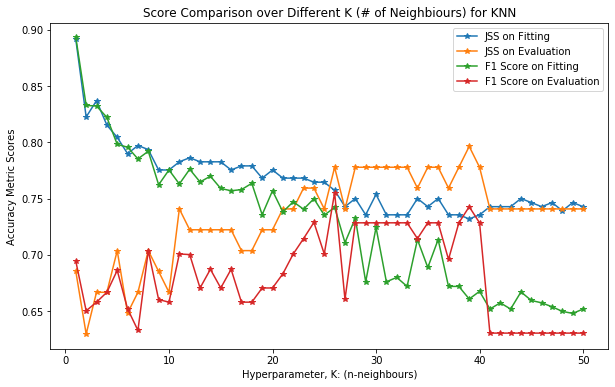

In [56]:
K=K_index
Scores_KNN_df= pd.DataFrame(list(zip(JSS_KNN_Fit, JSS_KNN_Evaluation, F1_KNN_Fit, F1_KNN_Evaluation, AS_KNN_Fit, AS_KNN_Evaluation)), index=K, columns=["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation",  "Accuracy Score on Fitting", "Accuracy Score on Evaluation"])
Scores_KNN_df[["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation"]].plot(marker='*' ,figsize=(10, 6))
plt.title("Score Comparison over Different K (# of Neighbiours) for KNN")
plt.xlabel("Hyperparameter, K: (n-neighbours)")
plt.ylabel("Accuracy Metric Scores")

<div class="alert alert-block alert-success"> 

**_KNN: Post Evaluation Review_**
    
In the modelling stage, more specifically at the validation assessment, I kept the decision pending regarding whether to choose k=7 or k=30.
    
Now, the chart above illustrates that k=30 generates the better scores thatn k=7 for the Evaluation Dataset. This might explain that k=30 does not account for the overfitting risk.
</div>

<div class="alert alert-block alert-success">
    
### Read_Me: <span style="color: blue;"> **_POST-Evaluation Review: Part 2"_**</span>
###  Decision Tree Model: Tuning of Hyperparameter, max_depth
</div>

In [57]:
# Iteration to Search for the Best Max_Depth

from sklearn import metrics

Ks = 30 #The upper limit of K for looping
K_index =np.arange(1,Ks+1) # K on X-axis for plotting
print("K_index: ", K_index)
# F1_Score for The Training Set (Fitting)
F1_DT_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_DT_Evaluation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_DT_Fit = np.zeros((Ks)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_DT_Evaluation = np.zeros((Ks)) #np.array to reserve F1 Score for Validation

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score


for n in range(1,Ks+1):
    
    #Create a Decision Tree object
    DecTree = DecisionTreeClassifier(criterion="entropy", max_depth=n)
    # Train the model on the training dataset
    DecTree.fit(X_train,y_train)
    yhat_DT_Fit=DecTree.predict(X_train)
    # Validation of the model on the test dataset
    yhat_DT_Evaluation=DecTree.predict(XTN)    
    
    #F1 Score for Fitting
    F1_DT_Fit[n-1] = " %.4f" % f1_score(y_train, yhat_DT_Fit, average='weighted') 
    #F1 Score for Validation
    F1_DT_Evaluation[n-1] = " %.4f" % f1_score(YT, yhat_DT_Evaluation, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_DT_Fit[n-1] = jaccard_similarity_score(y_train, yhat_DT_Fit)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_DT_Evaluation[n-1] =jaccard_similarity_score(YT, yhat_DT_Evaluation) 
    
    
print("n=: ", n)
print("F1 Score for Fitting: ", F1_DT_Fit)
print("F1 Score for Validation: ", F1_DT_Evaluation)
print("Validation Max of F1 Score: ", " %.4f" % F1_DT_Evaluation.max(), "@ MAX_DEPTH=", F1_DT_Evaluation.argmax()+1)
print("MAX_DEPTH of Validation Max F1 Score: ", F1_DT_Evaluation.argmax()+1)

print("Jaccard Similarity Score for Fitting: ", JSS_DT_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_DT_Evaluation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_DT_Evaluation.max(), "@ K=", JSS_DT_Evaluation.argmax()+1)
print("MAX_DEPTH of Validation Max Jaccard Similarity Score: ", JSS_DT_Evaluation.argmax()+1)


K_index:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

n=:  30
F1 Score for Fitting:  [0.6331 0.6331 0.7574 0.7574 0.7651 0.7329 0.7529 0.7587 0.8293 0.8242
 0.832  0.8723 0.8812 0.8913 0.8981 0.907  0.9111 0.9111 0.9111 0.9111
 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111 0.9111]
F1 Score for Validation:  [0.6304 0.6304 0.7367 0.7367 0.7733 0.6705 0.7007 0.7007 0.7778 0.7253
 0.7719 0.7619 0.7662 0.7303 0.7253 0.7253 0.7098 0.7253 0.7098 0.7253
 0.7098 0.7098 0.7253 0.7253 0.7253 0.7253 0.7253 0.7253 0.7253 0.7253]
Validation Max of F1 Score:   0.7778 @ MAX_DEPTH= 9
MAX_DEPTH of Validation Max F1 Score:  9
Jaccard Similarity Score for Fitting:  [0.74275362 0.74275362 0.74637681 0.74637681 0.75       0.77536232
 0.78985507 0.79710145 0.82971014 0.83695652 0.8442029  0.87318841
 0.88043478 0.89130435 0.89855072 0.9057971  0.90942029 0.90942029
 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029
 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029 0.90942029]
Jaccard Similarity Score for Validation:  [0.74

C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

Text(0, 0.5, 'Accuracy Metric Scores')

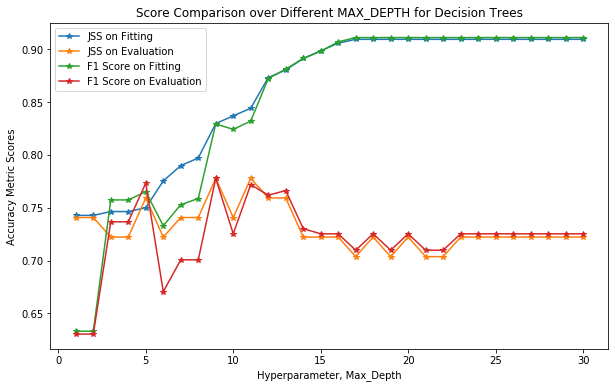

In [58]:
#Plot
Scores_DT_df= pd.DataFrame(list(zip(JSS_DT_Fit, JSS_DT_Evaluation, F1_DT_Fit, F1_DT_Evaluation)), index=K_index, columns=["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation"])
Scores_DT_df[["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation"]].plot(marker='*',figsize=(10, 6))
plt.title("Score Comparison over Different MAX_DEPTH for Decision Trees")
plt.xlabel("Hyperparameter, Max_Depth")
plt.ylabel("Accuracy Metric Scores")

<div class="alert alert-block alert-success"> 
    
**_Decision Trees: Post Evaluation Review_**
    
In the modelling, more specifically at the validation stage, I held the decision pending regarding whether to choose between  <span style="color: green;"> **_max_depth=15_**</span> and **_max_depth=7_**.
The Evaluation illustrates that <span style="color: green;"> **_max_depth=15_**</span> yielded more consistent result between F1 Score and JSS than **_max_depth=7_** did.
</div>

<div class="alert alert-block alert-success">
    
### Read_Me: <span style="color: blue;"> **_POST-Evaluation Review: Part 3"_**</span>
###  Support Vector Machine Model: Tuning of Optimization Parameter, kernel
</div>

In [59]:
# Try F1 Score
# Kernel Functions
Kernel_Functions=['linear', 'poly', 'rbf', 'sigmoid']

N=len(Kernel_Functions)

# F1_Score for The Training Set (Fitting)
F1_svm_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_svm_Evaluation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_svm_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_svm_Evaluation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Accuracy Score for the Training Set (Fitting)
AS_svm_Fit=np.zeros((N)) 
# Accuracy Score for the Testing Set (Validation)
AS_svm_Evaluation=np.zeros((N)) 


#Import SVM 
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score

    
n = 0
for kernel_choice in Kernel_Functions:
    
    n = n + 1
    #create SVM object
    SVM = svm.SVC(kernel=kernel_choice)
    
    # Train the model to the training dataset
    SVM.fit(X_train, y_train) 
    # Fitting the Train Dataset
    y_fit_SVM=SVM.predict(X_train)
    # Predict for validation using the test dataset
    y_Evaluation_SVM =SVM.predict(XTN)
    
    
    #F1 Score for Fitting
    F1_svm_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_SVM, average='weighted') 
    #F1 Score for Validation
    F1_svm_Evaluation[n-1] = " %.4f" % f1_score(YT, y_Evaluation_SVM, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_svm_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_SVM)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_svm_Evaluation[n-1] =jaccard_similarity_score(YT, y_Evaluation_SVM) 
    #Accuracy Score for Fitting
    #AS_svm_Fit[n-1]= metrics.accuracy_score(y_train, y_fit_SVM)
    #Accuracy Score for Validation Accuracy
    #AS_svm_Validation[n-1]= metrics.accuracy_score(y_test, y_validate_SVM)
    
    # set the counter
    
    
print(n)
print("F1 Score for Fitting: ", F1_svm_Fit)
print("F1 Score for Validation: ", F1_svm_Evaluation)
print("Validation Max of F1 Score: ", " %.4f" % F1_svm_Evaluation.max(), "@ K=", Kernel_Functions[F1_svm_Evaluation.argmax()])
print("Kernel of Validation Max F1 Score: ", Kernel_Functions[F1_svm_Evaluation.argmax()])

print("Jaccard Similarity Score for Fitting: ", JSS_svm_Fit)
print("Jaccard Similarity Score for Validation: ", JSS_svm_Evaluation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_svm_Evaluation.max(), "@ K=", Kernel_Functions[JSS_svm_Evaluation.argmax()+1])
print("Kernel of Validation Max Jaccard Similarity Score: ", Kernel_Functions[JSS_svm_Evaluation.argmax()+1])



4
F1 Score for Fitting:  [0.6331 0.7286 0.7682 0.6427]
F1 Score for Validation:  [0.6304 0.6959 0.7584 0.6379]
Validation Max of F1 Score:   0.7584 @ K= rbf
Kernel of Validation Max F1 Score:  rbf
Jaccard Similarity Score for Fitting:  [0.74275362 0.7826087  0.7826087  0.71014493]
Jaccard Similarity Score for Validation:  [0.74074074 0.75925926 0.7962963  0.7037037 ]
Validation Max of Jaccard Similarity Score:   0.7963 @ K= sigmoid
Kernel of Validation Max Jaccard Similarity Score:  sigmoid


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

Text(0.5, 0, 'Hyperparameter, kernel')

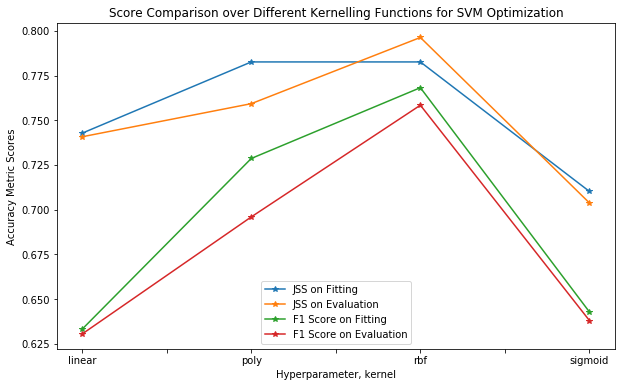

In [60]:
JSS_df= pd.DataFrame(list(zip(JSS_svm_Fit, JSS_svm_Evaluation, F1_svm_Fit, F1_svm_Evaluation, AS_svm_Fit, AS_svm_Evaluation)), index=Kernel_Functions, columns=["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation",  "Accuracy Score on Fitting", "Accuracy Score on Evaluation"])
#print(JSS_df)

JSS_df[["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation"]].plot(marker='*', figsize=(10, 6))
plt.title("Score Comparison over Different Kernelling Functions for SVM Optimization")
plt.ylabel("Accuracy Metric Scores")
plt.xlabel("Hyperparameter, kernel")

<div class="alert alert-block alert-success">
    

<span style="color: blue;"> **_SVM POST-Evaluation Review on kernel_**</span>
    
'rbf' demonstrates the most balanced outcome.
    
</div>

<div class="alert alert-block alert-success">
    
### Read_Me: <span style="color: blue;"> **_POST-Evaluation Review: Part 4"_**</span>
###  Logistic Regressions: Tuning of Optimization Parameter, solver
</div>

In [61]:
# Try F1 Score
# Kernel Functions
optimization=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

N=len(optimization)

# F1_Score for The Training Set (Fitting)
F1_LR_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# F1_Score for the Testing Set (Validation)
F1_LR_Evaluation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Jaccard Similarity Score for The Training Set (Fitting)
JSS_LR_Fit = np.zeros((N)) #np.array to reserve F1 Score for Fitting
# Jaccard Similarity Score for the Testing Set (Validation)
JSS_LR_Evaluation = np.zeros((N)) #np.array to reserve F1 Score for Validation
# Log Loss Score for the Training Set (Fitting)
Log_LR_Fit=np.zeros((N)) 
# Log Loss Score for the Testing Set (Validation)
Log_LR_Evaluation=np.zeros((N)) 


#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

n = 0
for opt in optimization:
    
    # Create Logistic Regression Object
    LR = LogisticRegression(C=0.5, solver=opt)
#    LR = LogisticRegression(solver=opt)
     
    # Train the model to the training dataset
    LR.fit(X_train, y_train)
    
    # Fitting the Train Dataset
    y_fit_LR=LR.predict(X_train)
    y_fit_LR_prob = LR.predict_proba(X_train)
    # Predict for validation using the test dataset
    y_Evaluation_LR =LR.predict(XTN)
    y_Evaluation_LR_prob = LR.predict_proba(XTN)
    
    #F1 Score for Fitting
    F1_LR_Fit[n-1] = " %.4f" % f1_score(y_train, y_fit_LR, average='weighted') 
    #F1 Score for Validation
    F1_LR_Evaluation[n-1] = " %.4f" % f1_score(YT, y_Evaluation_LR, average='weighted') 
    #Jaccard Similarity Score for Fitting
    JSS_LR_Fit[n-1] = jaccard_similarity_score(y_train, y_fit_LR)
    #Jaccard Similarity Score for Validation Accuracy
    JSS_LR_Evaluation[n-1] =jaccard_similarity_score(YT, y_Evaluation_LR) 
    #Log Loss Score for Fitting
    Log_LR_Fit[n-1]= log_loss(y_train, y_fit_LR_prob)
    #Log Loss Score for Validation Accuracy
    Log_LR_Evaluation[n-1]= log_loss(YT, y_Evaluation_LR_prob)
    
    # set the counter
    n = n + 1
    
print(n)
print("F1 Score for Fitting: ", F1_LR_Fit)
print("F1 Score for Evaluation: ", F1_LR_Evaluation)
print("Validation Max of F1 Score: ", " %.4f" % F1_LR_Evaluation.max(), "@ solver=", optimization[F1_LR_Evaluation.argmax()])
print("Best Optimization of Evaluation Max F1 Score: ", optimization[F1_LR_Evaluation.argmax()])

print("Jaccard Similarity Score for Fitting: ", JSS_LR_Fit)
print("Jaccard Similarity Score for Evaluation: ", JSS_LR_Evaluation)
print("Validation Max of Jaccard Similarity Score: ", " %.4f" % JSS_LR_Evaluation.max(), "@ solver=", optimization[JSS_LR_Evaluation.argmax()])
print("Best Optimization of Evaluation Max Jaccard Similarity Score: ", optimization[JSS_LR_Evaluation.argmax()])

print("Log Loss for Fitting: ", Log_LR_Fit)
print("Log Loss for Evaluation: ", Log_LR_Evaluation)
print("Validation Min of Log Loss: ", " %.4f" % Log_LR_Validation.min(), "@ solver=", optimization[Log_LR_Evaluation.argmin()])
print("Best Optimization of Evaluation Min Log Loss: ", optimization[Log_LR_Evaluation.argmin()])


5
F1 Score for Fitting:  [0.7271 0.7399 0.7271 0.7271 0.7271]
F1 Score for Evaluation:  [0.6718 0.6604 0.6718 0.6718 0.6718]
Validation Max of F1 Score:   0.6718 @ solver= newton-cg
Best Optimization of Evaluation Max F1 Score:  newton-cg
Jaccard Similarity Score for Fitting:  [0.75724638 0.76449275 0.75724638 0.75724638 0.75724638]
Jaccard Similarity Score for Evaluation:  [0.75925926 0.74074074 0.75925926 0.75925926 0.75925926]
Validation Max of Jaccard Similarity Score:   0.7593 @ solver= newton-cg
Best Optimization of Evaluation Max Jaccard Similarity Score:  newton-cg
Log Loss for Fitting:  [0.42232736 0.42443281 0.42232803 0.42233064 0.42232743]
Log Loss for Evaluation:  [0.47046059 0.46872863 0.47046649 0.47048903 0.47046155]
Validation Min of Log Loss:   0.4947 @ solver= lbfgs
Best Optimization of Evaluation Min Log Loss:  lbfgs


C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\msugi\anaconda3\lib\site-pac

Text(0.5, 0, 'Optimization, solver')

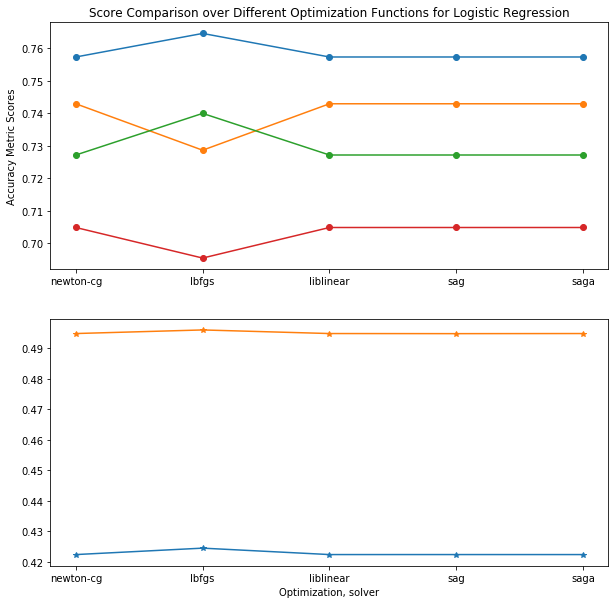

In [62]:
LR_Evaluation_df= pd.DataFrame(list(zip(JSS_LR_Fit, JSS_LR_Evaluation, F1_LR_Fit, F1_LR_Evaluation)), index=optimization, columns=["JSS on Fitting", "JSS on Evaluation", "F1 Score on Fitting", "F1 Score on Evaluation"])
LR_Evaluation_sub=pd.DataFrame(list(zip(Log_LR_Fit, Log_LR_Evaluation)), index=optimization, columns=["Log Loss on Fitting", "Log Loss on Evaluation"])

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.plot(LR_Validation_df, marker='o')
plt.title("Score Comparison over Different Optimization Functions for Logistic Regression")
plt.ylabel("Accuracy Metric Scores")
plt.subplot(2,1,2)
plt.plot(LR_Validation_sub, marker='*')

plt.xlabel("Optimization, solver")

<div class="alert alert-block alert-success">
    
#### <span style="color: blue;"> **_Logistic Regressions: POST-Evaluation Review_**</span>

There is no material difference among these options.
    
</div>

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>